In [1]:
import pandas as pd 
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
from sklearn.model_selection import train_test_split
import locale


# Import Data from TXT

In [2]:
def text_to_df_suv(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()
        # Satırları temizleyelim (boş satırları ve gereksiz karakterleri temizleyelim)
        lines = [line.strip() for line in lines if line.strip()]  # Boş satırları atla
        
    # Boş bir liste oluşturuyoruz, her bir blok burada saklanacak
    blocks = []
    current_block = []
    
    # Veriyi satır satır işle
    for record in lines:
    # "Takas Evet" veya "Takas Hayır" varsa, yeni bir blok başlatıyoruz
        current_block.append(record)
        
    # Eğer "Takas" bilgisi var ise, blok tamamlanmış demektir
        if "Takas Evet" in record or "Takas Hayır" in record:
            blocks.append(current_block)  # Mevcut bloğu ekle
            current_block = []  # Yeni bir blok için temizle
    
     # Eğer son blokta hala veriler varsa, onu da ekle
    if current_block:
        blocks.append(current_block)
    datas = []
    for block in blocks:
        block = list(block)
        cleaned_record = {}
    
        if len(block)==23:
            #print("Elektrikli araç")
            cleaned_record['Fiyat'] = block[0].replace("TL", "").strip()  # Fiyat
            cleaned_record['Adres'] = block[2].replace("Adres", "").strip()  # Adres
            cleaned_record['İlan No'] = block[3].replace('İlan No', "").strip()
            cleaned_record['İlan Tarihi'] = block[4].replace('İlan Tarihi', "").strip()
            cleaned_record['Marka'] = block[5].replace('Marka', "").strip()
            cleaned_record['Seri'] = block[6].replace('Seri', "").strip()
            cleaned_record['Model'] = block[7].replace('Model', "").strip()
            cleaned_record['Yıl'] = block[8].replace('Yıl', "").strip()
            cleaned_record['Yakıt'] = block[9].replace('Yakıt', "").strip()
            cleaned_record['Vites'] = block[10].replace('Vites', "").strip()
            cleaned_record['Araç Durumu'] = block[11].replace('Araç Durumu', "").strip()
            cleaned_record['KM'] = block[12].replace('KM', "").strip()
            cleaned_record['Kasa Tipi'] = block[13].replace('Kasa Tipi', "").strip()
            cleaned_record['Motor Gücü'] = block[14].replace('Motor Gücü', "").strip()
            cleaned_record['Çekiş'] = block[15].replace('Çekiş', "").strip()
            cleaned_record['Kapı'] = block[16].replace('Kapı', "").strip()
            cleaned_record['Renk'] = block[17].replace('Renk', "").strip()
            cleaned_record['Garanti'] = block[18].replace('Garanti', "").strip()
            cleaned_record['Ağır Hasar Kayıtlı'] = block[19].replace('Ağır Hasar Kayıtlı', "").strip()
            cleaned_record['Plaka / Uyruk'] = block[20].replace('Plaka / Uyruk', "").strip()
            cleaned_record['Kimden'] = block[21].replace('Kimden', "").strip()
            cleaned_record['Takas'] = block[22].replace('Takas', "").strip()
            datas.append(cleaned_record)
        if len(block)==24:
            #print("Eski tip araç")
            cleaned_record['Fiyat'] = block[0].replace("TL", "").strip()  # Fiyat
            cleaned_record['Adres'] = block[2].replace("Adres", "").strip()  # Adres
            cleaned_record['İlan No'] = block[3].replace('İlan No', "").strip()
            cleaned_record['İlan Tarihi'] = block[4].replace('İlan Tarihi', "").strip()
            cleaned_record['Marka'] = block[5].replace('Marka', "").strip()
            cleaned_record['Seri'] = block[6].replace('Seri', "").strip()
            cleaned_record['Model'] = block[7].replace('Model', "").strip()
            cleaned_record['Yıl'] = block[8].replace('Yıl', "").strip()
            cleaned_record['Yakıt'] = block[9].replace('Yakıt', "").strip()
            cleaned_record['Vites'] = block[10].replace('Vites', "").strip()
            cleaned_record['Araç Durumu'] = block[11].replace('Araç Durumu', "").strip()
            cleaned_record['KM'] = block[12].replace('KM', "").strip()
            cleaned_record['Kasa Tipi'] = block[13].replace('Kasa Tipi', "").strip()
            cleaned_record['Motor Gücü'] = block[14].replace('Motor Gücü', "").strip()
            cleaned_record['Motor Hacmi'] = block[15].replace('Motor Hacmi', "").strip()
            cleaned_record['Çekiş'] = block[16].replace('Çekiş', "").strip()
            cleaned_record['Kapı'] = block[17].replace('Kapı', "").strip()
            cleaned_record['Renk'] = block[18].replace('Renk', "").strip()
            cleaned_record['Garanti'] = block[19].replace('Garanti', "").strip()
            cleaned_record['Ağır Hasar Kayıtlı'] = block[20].replace('Ağır Hasar Kayıtlı', "").strip()
            cleaned_record['Plaka / Uyruk'] = block[21].replace('Plaka / Uyruk', "").strip()
            cleaned_record['Kimden'] = block[22].replace('Kimden', "").strip()
            cleaned_record['Takas'] = block[23].replace('Takas', "").strip()
            datas.append(cleaned_record)
    df = pd.DataFrame(datas)
    return df

In [3]:
def text_to_df(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()
        # Satırları temizleyelim (boş satırları ve gereksiz karakterleri temizleyelim)
        lines = [line.strip() for line in lines if line.strip()]  # Boş satırları atla
        
    # Boş bir liste oluşturuyoruz, her bir blok burada saklanacak
    blocks = []
    current_block = []
    
    # Veriyi satır satır işle
    for record in lines:
    # "Takas Evet" veya "Takas Hayır" varsa, yeni bir blok başlatıyoruz
        current_block.append(record)
        
    # Eğer "Takas" bilgisi var ise, blok tamamlanmış demektir
        if "Takas Evet" in record or "Takas Hayır" in record:
            blocks.append(current_block)  # Mevcut bloğu ekle
            current_block = []  # Yeni bir blok için temizle
    
     # Eğer son blokta hala veriler varsa, onu da ekle
    if current_block:
        blocks.append(current_block)
    datas = []
    for block in blocks:
        block = list(block)
        cleaned_record = {}
    
        if len(block)==22:
            #print("Elektrikli araç")
            cleaned_record['Fiyat'] = block[0].replace("TL", "").strip()  # Fiyat
            cleaned_record['Adres'] = block[2].replace("Adres", "").strip()  # Adres
            cleaned_record['İlan No'] = block[3].replace('İlan No', "").strip()
            cleaned_record['İlan Tarihi'] = block[4].replace('İlan Tarihi', "").strip()
            cleaned_record['Marka'] = block[5].replace('Marka', "").strip()
            cleaned_record['Seri'] = block[6].replace('Seri', "").strip()
            cleaned_record['Model'] = block[7].replace('Model', "").strip()
            cleaned_record['Yıl'] = block[8].replace('Yıl', "").strip()
            cleaned_record['Yakıt'] = block[9].replace('Yakıt', "").strip()
            cleaned_record['Vites'] = block[10].replace('Vites', "").strip()
            cleaned_record['Araç Durumu'] = block[11].replace('Araç Durumu', "").strip()
            cleaned_record['KM'] = block[12].replace('KM', "").strip()
            cleaned_record['Kasa Tipi'] = block[13].replace('Kasa Tipi', "").strip()
            cleaned_record['Motor Gücü'] = block[14].replace('Motor Gücü', "").strip()
            cleaned_record['Çekiş'] = block[15].replace('Çekiş', "").strip()
            cleaned_record['Renk'] = block[16].replace('Renk', "").strip()
            cleaned_record['Garanti'] = block[17].replace('Garanti', "").strip()
            cleaned_record['Ağır Hasar Kayıtlı'] = block[18].replace('Ağır Hasar Kayıtlı', "").strip()
            cleaned_record['Plaka / Uyruk'] = block[19].replace('Plaka / Uyruk', "").strip()
            cleaned_record['Kimden'] = block[20].replace('Kimden', "").strip()
            cleaned_record['Takas'] = block[21].replace('Takas', "").strip()
            datas.append(cleaned_record)
        if len(block)==23:
            #print("Eski tip araç")
            cleaned_record['Fiyat'] = block[0].replace("TL", "").strip()  # Fiyat
            cleaned_record['Adres'] = block[2].replace("Adres", "").strip()  # Adres
            cleaned_record['İlan No'] = block[3].replace('İlan No', "").strip()
            cleaned_record['İlan Tarihi'] = block[4].replace('İlan Tarihi', "").strip()
            cleaned_record['Marka'] = block[5].replace('Marka', "").strip()
            cleaned_record['Seri'] = block[6].replace('Seri', "").strip()
            cleaned_record['Model'] = block[7].replace('Model', "").strip()
            cleaned_record['Yıl'] = block[8].replace('Yıl', "").strip()
            cleaned_record['Yakıt'] = block[9].replace('Yakıt', "").strip()
            cleaned_record['Vites'] = block[10].replace('Vites', "").strip()
            cleaned_record['Araç Durumu'] = block[11].replace('Araç Durumu', "").strip()
            cleaned_record['KM'] = block[12].replace('KM', "").strip()
            cleaned_record['Kasa Tipi'] = block[13].replace('Kasa Tipi', "").strip()
            cleaned_record['Motor Gücü'] = block[14].replace('Motor Gücü', "").strip()
            cleaned_record['Motor Hacmi'] = block[15].replace('Motor Hacmi', "").strip()
            cleaned_record['Çekiş'] = block[16].replace('Çekiş', "").strip()
            cleaned_record['Renk'] = block[17].replace('Renk', "").strip()
            cleaned_record['Garanti'] = block[18].replace('Garanti', "").strip()
            cleaned_record['Ağır Hasar Kayıtlı'] = block[19].replace('Ağır Hasar Kayıtlı', "").strip()
            cleaned_record['Plaka / Uyruk'] = block[20].replace('Plaka / Uyruk', "").strip()
            cleaned_record['Kimden'] = block[21].replace('Kimden', "").strip()
            cleaned_record['Takas'] = block[22].replace('Takas', "").strip()
            datas.append(cleaned_record)
    df = pd.DataFrame(datas)
    return df

In [4]:
arac1 =  text_to_df(r"txt\araçlar.txt")
arac2 =  text_to_df(r"txt\araçlar1.txt")
arac3 =  text_to_df(r"txt\BMW_1.txt")
arac4 =  text_to_df(r"txt\BMW_2.txt")
arac5 =  text_to_df(r"txt\BMW_3.txt")
arac6 =  text_to_df(r"txt\BMW_4.txt")
arac7 =  text_to_df(r"txt\BMW_5.txt")
arac8 =  text_to_df(r"txt\Chevrolet.txt")
arac9 =  text_to_df(r"txt\Ford_1.txt")
arac10 = text_to_df(r"txt\Ford_2.txt")
arac11 = text_to_df(r"txt\Honda.txt")
arac12 = text_to_df(r"txt\Fiat_1.txt")
arac13 = text_to_df(r"txt\Fiat2.txt")
arac14 = text_to_df(r"txt\Fiat3.txt")
arac15 = text_to_df(r"txt\Ford_3.txt")
arac16 = text_to_df(r"txt\Ford_4.txt")


In [5]:
araclar2 = pd.concat([arac1, arac2, arac3, arac4, arac5, arac6, arac7, arac8, arac9, 
                      arac10, arac11, arac12, arac13, arac14, arac15, arac16], ignore_index=True)

In [6]:
araclar2.shape

(3357, 22)

In [7]:
araclar2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Fiyat,850.000,1.199.900,610.000,1.200.000,819.000,1.385.000,1.038.750,915.000,1.310.000,875.000
Adres,Adana / Seyhan / Gürselpaşa Mh.,Adana / Seyhan / Reşatbey Mh.,Adana / Seyhan / Fatih Mah.,Adana / Seyhan / Fevzipaşa Mh.,Adana / Seyhan / Yeşiloba Mh.,Adana / Seyhan / Yeşiloba Mh.,Adana / Seyhan / Yeşiloba Mh.,Adana / Seyhan / İsmetpaşa Mh.,Adana / Seyhan / Yeşiloba Mh.,Adana / Seyhan / Pınar Mh.
İlan No,1207237973,1158263496,1201289032,1207666660,1204144497,1191804835,1203842237,1207290415,1203664708,1200235713
İlan Tarihi,26 Ekim 2024,11 Ekim 2024,09 Ekim 2024,29 Ekim 2024,28 Ekim 2024,28 Ekim 2024,27 Ekim 2024,26 Ekim 2024,26 Ekim 2024,26 Ekim 2024
Marka,Audi,Audi,Audi,Audi,Audi,Audi,Audi,Audi,Audi,Audi
Seri,A1,A1,A1,A3,A3,A3,A3,A3,A3,A3
Model,1.6 TDI Attraction,1.6 TDI Sport,1.4 TFSI Attraction,A3 Sportback 1.6 TDI Sport Line,A3 Sportback 1.6 TDI Ambiente,A3 Sportback 30 TDI Sport,A3 Sedan 1.6 TDI Ambition,A3 Sedan 1.6 TDI Ambiente,A3 Sedan 35 TFSI Design,A3 Sportback 1.6 TDI Attraction
Yıl,2012,2016,2011,2016,2014,2019,2015,2014,2020,2016
Yakıt,Dizel,Dizel,Benzin,Dizel,Dizel,Dizel,Dizel,Dizel,Benzin,Dizel
Vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik


In [8]:
bmw1 =         text_to_df_suv(r"txt\BMW1.txt")
bmw2 =         text_to_df_suv(r"txt\BMW2.txt")
alfaRomeo =    text_to_df_suv(r"txt\alfaRomeo_SUV_161Adet.txt")
fordExplorer = text_to_df_suv(r"txt\Ford_Explorer_SUV_28.txt")
fordKuga =     text_to_df_suv(r"txt\Ford_Kuga_SUV_.txt")
fordPuma =     text_to_df_suv(r"txt\Ford_Puma_SUV+340.txt")
fordRanger =   text_to_df_suv(r"txt\Ford_Ranger_SUV+600.txt")
dodge =        text_to_df_suv(r"txt\ilan_dodge_SUV_185.txt")

In [9]:
bmw2.head(1000).T

,0,1,2,3,4,5,6,7,8,9,...,817,818,819,820,821,822,823,824,825,826
Fiyat,1.400.000,1.499.000,1.550.000,1.550.000,1.425.000,1.550.000,1.290.000,1.495.000,2.175.000,1.460.000,...,675.000,690.000,920.000,535.000,580.000,795.000,590.000,1.050.000,540.000,635.000
Adres,Konya / Karatay / Fevziçakmak Mh.,Kayseri / Melikgazi / Anbar Mah.,İstanbul / Bağcılar / Göztepe Mh.,İstanbul / Bahçelievler / Çobançeşme Mh.,Tekirdağ / Çorlu / Reşadiye Mh.,İstanbul / Beşiktaş / Kuruçeşme Mh.,İstanbul / Avcılar / Tahtakale Mah.,İzmir / Karşıyaka / Aksoy Mah.,İstanbul / Ataşehir / İçerenköy Mh.,İstanbul / Kadıköy / Dumlupınar Mh.,...,Amasya / Suluova / Harmanağılı Köyü,Sivas / Merkez / Selçuklu Mh.,İstanbul / Sultanbeyli / Mehmet Akif Mah.,İstanbul / Sultanbeyli / Hamidiye Mah.,İzmir / Bayraklı / Org. Nafiz Gürman Mh.,Erzurum / Aziziye / Saltuklu,Elazığ / Merkez / Kızılay Mh.,İstanbul / Esenyurt / Örnek Mh.,İstanbul / Pendik / Yeni Mh.,Kocaeli / Başiskele / Serdar Mah.
İlan No,1198235119,1215082653,1215080090,1215071134,1215000678,1195076591,1192999960,1214710315,1208057184,1208463362,...,1210010008,1209995650,1209341605,1210225618,1209960033,1100181901,1209392689,1209734269,1209360066,1203929427
İlan Tarihi,02 Aralık 2024,04 Aralık 2024,04 Aralık 2024,04 Aralık 2024,04 Aralık 2024,04 Aralık 2024,02 Aralık 2024,02 Aralık 2024,02 Aralık 2024,02 Aralık 2024,...,10 Kasım 2024,10 Kasım 2024,11 Kasım 2024,11 Kasım 2024,10 Kasım 2024,09 Kasım 2024,07 Kasım 2024,09 Kasım 2024,06 Kasım 2024,12 Ekim 2024
Marka,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Seri,X3,X3,X3,X3,X3,X3,X3,X3,X3,X3,...,X5,X5,X5,X5,X5,X5,X5,X5,X5,X5
Model,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,20i sDrive,...,44,44,44,44,44,44,44,44,44,44
Yıl,2016,2014,2014,2014,2014,2014,2015,2014,2018,2014,...,2000,2000,2001,2001,2000,2001,2003,2003,2003,2000
Yakıt,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,...,Benzin & LPG,Benzin & LPG,Benzin,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin,Benzin,Benzin & LPG
Vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,...,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik


-> We loaded all scraped data in ide, after now we are going to do One Hot Encoder, Label Encoder, Convert the time to timetamp, EDA, Data Visualization and few operation like that on the data.

In [10]:
araclar = pd.concat([bmw1, bmw2, alfaRomeo, fordExplorer, fordPuma, fordKuga, fordRanger, dodge], ignore_index=True)

In [11]:
araclar = pd.concat([araclar, araclar2], ignore_index= True)

# Exploratory Data Analyze

In [12]:
araclar.shape

(7928, 23)

In [13]:
araclar.head(1000).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Fiyat,5.100.000,4.970.000,6.350.000,4.585.000,5.244.400,5.130.000,5.000.000,5.750.000,5.550.000,5.668.800,...,2.835.000,2.090.000,3.825.000,2.075.000,2.225.000,3.625.000,2.377.000,2.907.000,1.500.000,2.450.000
Adres,Muğla / Bodrum / Bitez Mah.,İstanbul / Sarıyer / Zekeriyaköy Mh.,Kocaeli / Gebze / Osman Yılmaz Mh.,İstanbul / Ataşehir / İçerenköy Mh.,Bursa / Nilüfer / Alaaddinbey Mah.,İstanbul / Avcılar / Denizköşkler Mh.,İstanbul / Ataşehir / Küçükbakkalköy Mh.,Giresun / Bulancak / İhsaniye Mh.,İstanbul / Beylikdüzü / Beylikdüzü OSB,Eskişehir / Tepebaşı / Satılmışoğlu Mh.,...,İstanbul / Beşiktaş / Levent Mah.,İstanbul / Sarıyer / Maslak Mah.,İstanbul / Bayrampaşa / Yenidoğan Mh.,İstanbul / Bahçelievler / Kocasinan Merkez Mah.,İstanbul / Beşiktaş / Nisbetiye Mh.,Kocaeli / Gebze / Osman Yılmaz Mh.,Ankara / Çankaya / Konutkent Mah.,Manisa / Yunusemre / Evrenos Mh.,İstanbul / Sancaktepe / Atatürk Mh.,İzmir / Karşıyaka / Yalı Mh.
İlan No,1213575242,1195328689,1161113579,1201285129,1161296709,1213845422,1194197880,1071639497,1210953754,1213903200,...,1215099751,1180971655,1188077704,1196859154,1214808396,1204874376,1182002015,1208619153,1177853417,1129287520
İlan Tarihi,26 Kasım 2024,02 Aralık 2024,01 Aralık 2024,01 Aralık 2024,28 Kasım 2024,28 Kasım 2024,30 Kasım 2024,27 Kasım 2024,29 Kasım 2024,28 Kasım 2024,...,04 Aralık 2024,04 Aralık 2024,03 Aralık 2024,03 Aralık 2024,03 Aralık 2024,03 Aralık 2024,03 Aralık 2024,03 Aralık 2024,03 Aralık 2024,02 Aralık 2024
Marka,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Seri,iX,iX,iX,iX,iX,iX,iX,iX,iX,iX,...,X3,X3,X3,X3,X3,X3,X3,X3,X3,X3
Model,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,...,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line,20i sDrive X Line
Yıl,2022,2023,2023,2023,2022,2023,2023,2022,2023,2023,...,2020,2018,2024,2018,2018,2023,2019,2021,2015,2019
Yakıt,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,...,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin
Vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,...,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik


In [14]:
araclar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fiyat               7928 non-null   object
 1   Adres               7928 non-null   object
 2   İlan No             7928 non-null   object
 3   İlan Tarihi         7928 non-null   object
 4   Marka               7928 non-null   object
 5   Seri                7928 non-null   object
 6   Model               7928 non-null   object
 7   Yıl                 7928 non-null   object
 8   Yakıt               7928 non-null   object
 9   Vites               7928 non-null   object
 10  Araç Durumu         7928 non-null   object
 11  KM                  7928 non-null   object
 12  Kasa Tipi           7928 non-null   object
 13  Motor Gücü          7928 non-null   object
 14  Çekiş               7928 non-null   object
 15  Kapı                4571 non-null   object
 16  Renk                7928

-> In this section, we can see a difference between  'Motor Hacmi' and other columns because electrical vehicle dosen't have the Engine Size info like old school vehicles...

In [15]:
araclar.rename(columns={
    "Fiyat": "fiyat",
    "Adres": "adres",
    "İlan No": "no",
    "İlan Tarihi": "ilanTarihi",
    "Marka": "marka",
    "Seri": "seri",
    "Model": "model",
    "Yıl": "yil",
    "Yakıt": "yakit",
    "Vites": "vites",
    "Araç Durumu": "durum",
    "KM": "km",
    "Kasa Tipi": "kasa",
    "Motor Gücü": "hp",
    "Çekiş": "cekis",
    "Kapı": "kapi",
    "Renk": "renk",
    "Garanti": "garanti",
    "Ağır Hasar Kayıtlı": "agirHasar",
    "Plaka / Uyruk": "uyruk",
    "Kimden": "kimden",
    "Takas": "takas",
    "Motor Hacmi": "motorHacim"
}, inplace=True)

In [16]:
araclar[['sehir', 'ilce']] = araclar['adres'].str.split('/', expand=True).iloc[:, :2]
araclar = araclar.drop(columns=['adres'])

In [17]:
# Drop 'hp' on hp column
araclar['hp'] = araclar['hp'].str.replace(' hp', '', regex=False)
araclar['hp'] = araclar['hp'].str.replace(' HP', '', regex=False)
# if there is a range will get only the biggest value
araclar['hp'] = araclar['hp'].str.split('-').str[-1].str.strip()
araclar['hp'] = araclar['hp'].str.replace(r'\D', '', regex=True)

In [18]:
araclar['motorHacim'] = araclar['motorHacim'].str.replace(r'\D', '', regex=True)
# Fonksiyon tanımı
def process_value(value):
    if pd.isna(value):  # NaN değerler korunur
        return value
    if len(value) == 5 or len(value) == 9:  # 5 veya 9 karakterli
        value = value[:-1]  # Son karakteri kaldır
    if len(value) == 8:  # Eğer hala 8 karakterse
        value = value[-4:]  # Son 4 karakteri al
    return value
araclar['motorHacim'] = araclar['motorHacim'].replace('nan', '0')
# İşlem sütuna uygulanır
araclar['motorHacim'] = araclar['motorHacim'].astype(str).apply(process_value)

In [19]:
araclar['motorHacim'] = araclar['motorHacim'].replace('nan', '0')

In [20]:
araclar['kapi'] = araclar['kapi'].replace('nan', '0')
araclar['kapi'] = araclar['kapi'].replace('Belirtilmemiş', '0')
araclar["kapi"] = araclar["kapi"].fillna(0)

In [21]:
# 1. Türkçe sayı formatını standartlaştırma
# Binlik ayraç olan '.' işaretini kaldır ve ',' yerine '.' koy
araclar['fiyat'] = araclar['fiyat'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
araclar['km'] = araclar['km'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

In [22]:
def tahmin_kapi(row):
    if row['kapi'] == 0 or row["kapi"] == '0':  # Sadece 'kapi' değeri 0 olan satırları işle
        kasa = row['kasa']
        if 'Hatchback 5 kapı' in kasa:
            return '5'
        elif 'Hatchback 3 kapı' in kasa:
            return '3'
        elif 'Coupe 4 kapı' in kasa:
            return '4'
        elif 'Coupe' in kasa:
            return '2'
        elif 'Station Wagon' in kasa:
            return '5'
        elif 'Sedan' in kasa:
            return '5'
        elif 'Pickup' in kasa:
            return '4'
        elif 'Cabrio' in kasa:
            return '3'
        elif 'MPV' in kasa:
            return  '5'
        elif 'SUV' in kasa:
            return '5'
    return str(row['kapi'])  # Diğer durumlarda mevcut değeri stringe çevirip koru

# Her satıra fonksiyonu uygula
araclar['kapi'] = araclar.apply(tahmin_kapi, axis=1)
araclar['kasa'] = araclar['kasa'].str.replace(r'\b[3-5] kapı\b', '', regex=True).str.strip()
araclar = araclar[~araclar['kasa'].str.contains(
    'Motor Gücü 280 hp|Motor Gücü 276 - 300 hp|Motor Gücü 200 hp', regex=True
)]

In [23]:
araclar.head(8).T

,0,1,2,3,4,5,6,7
fiyat,5100000,4970000,6350000,4585000,5244400,5130000,5000000,5750000
no,1213575242,1195328689,1161113579,1201285129,1161296709,1213845422,1194197880,1071639497
ilanTarihi,26 Kasım 2024,02 Aralık 2024,01 Aralık 2024,01 Aralık 2024,28 Kasım 2024,28 Kasım 2024,30 Kasım 2024,27 Kasım 2024
marka,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
seri,iX,iX,iX,iX,iX,iX,iX,iX
model,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50,xDrive50
yil,2022,2023,2023,2023,2022,2023,2023,2022
yakit,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik
vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik
durum,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El


In [24]:
categorical_columns = ["takas", "garanti", "kimden", "uyruk", "agirHasar", "renk", "cekis",
                       "durum", "vites", "yakit", "seri", "marka", "sehir", "ilce"] 
numerical_columns = ["fiyat", "no", "yil", "km", "hp", "kapi", "motorHacim"]

In [25]:
# Changing data type of columns
for column in numerical_columns:
    araclar[column] = pd.to_numeric(araclar[column], errors='coerce')

In [26]:
araclar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7897 entries, 0 to 7927
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fiyat       7897 non-null   int64 
 1   no          7897 non-null   int64 
 2   ilanTarihi  7897 non-null   object
 3   marka       7897 non-null   object
 4   seri        7897 non-null   object
 5   model       7897 non-null   object
 6   yil         7897 non-null   int64 
 7   yakit       7897 non-null   object
 8   vites       7897 non-null   object
 9   durum       7897 non-null   object
 10  km          7897 non-null   int64 
 11  kasa        7897 non-null   object
 12  hp          7897 non-null   int64 
 13  cekis       7897 non-null   object
 14  kapi        7897 non-null   int64 
 15  renk        7897 non-null   object
 16  garanti     7897 non-null   object
 17  agirHasar   7897 non-null   object
 18  uyruk       7897 non-null   object
 19  kimden      7897 non-null   object
 20  takas       7

# Data Visualization

## a) Distribution Visualizaiton

In [27]:
def plot_categorical_distributions(df, categorical_columns):
    # Görsel ayarları yapmak
    sns.set(style="whitegrid")
    
    # Her bir kategorik sütun için bar plot çizdirme
    for column in categorical_columns:
        if column=="ilce":
            pass
        plt.figure(figsize=(10,6))  # Grafik boyutlarını ayarla
        
        # Kategorik verilerin dağılımını çiz
        sns.countplot(data=df, x=column, palette='Set2')
        
        # Başlık ve etiketler
        plt.title(f'{column} Dağılımları', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frekans', fontsize=14)
        
        # X eksenindeki etiketleri 45 derece eğik yap
        plt.xticks(rotation=45, ha='right')
        
        # Grafik tasarımını güzelleştirme
        plt.tight_layout()
        
        # Grafiği göster
        plt.show()

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


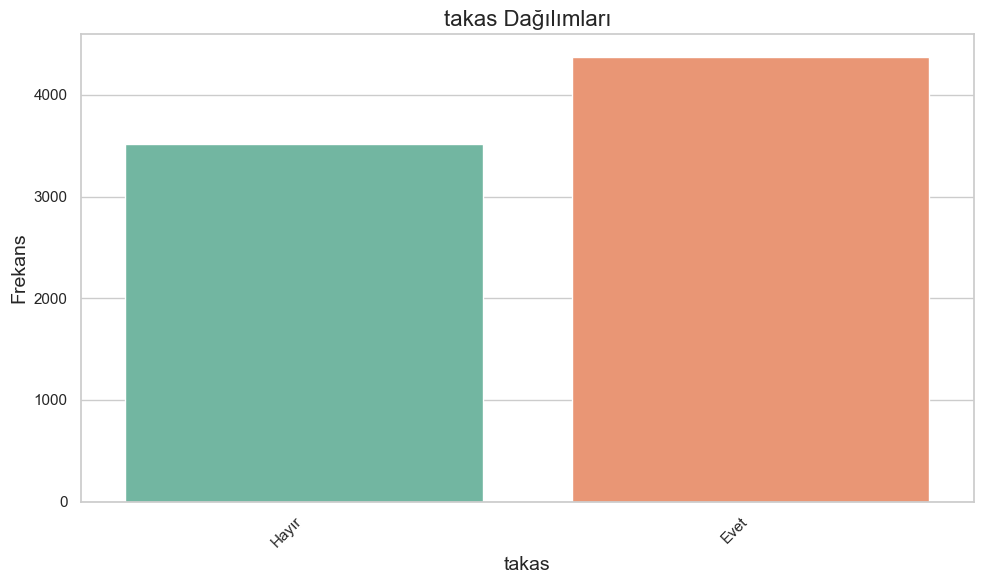

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


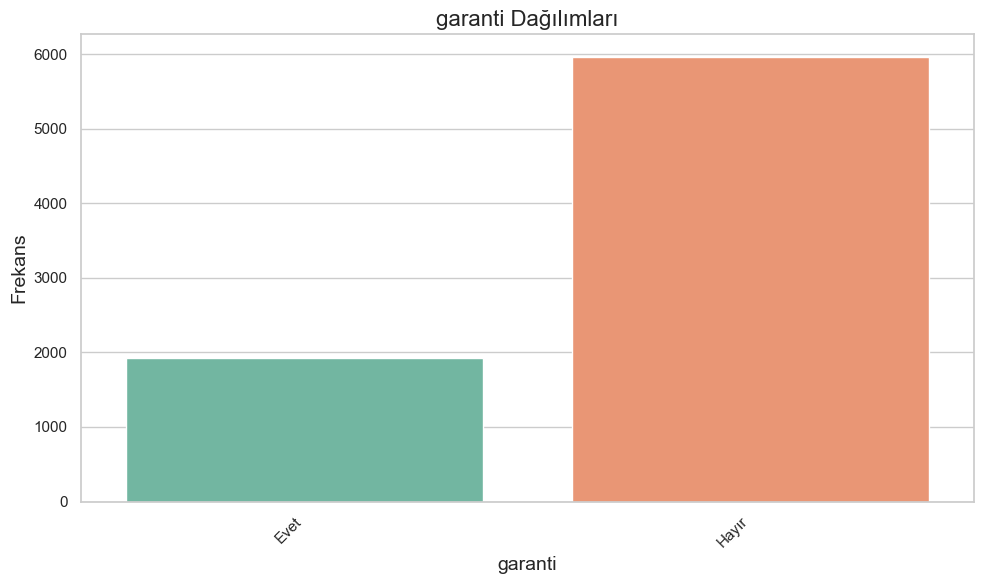

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


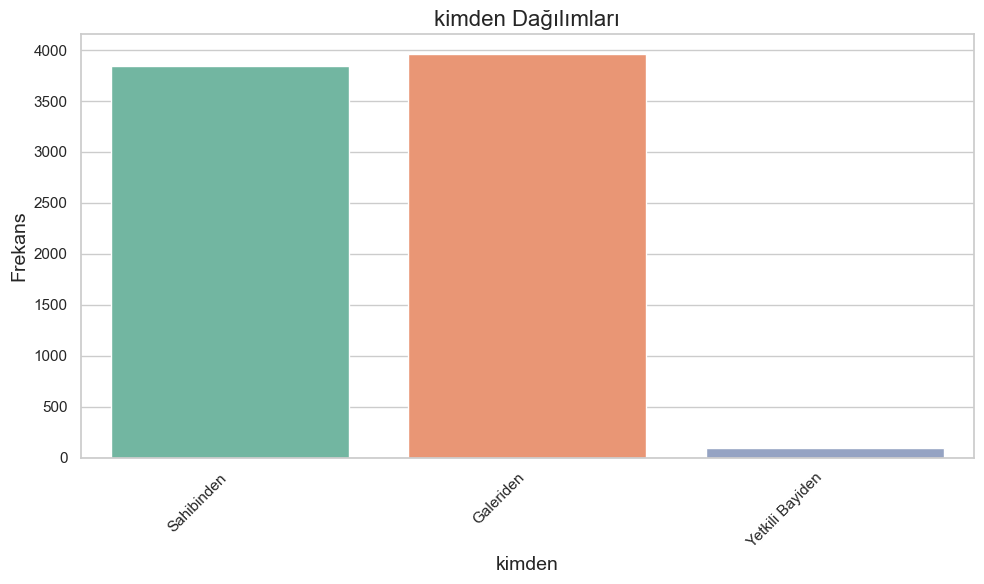

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


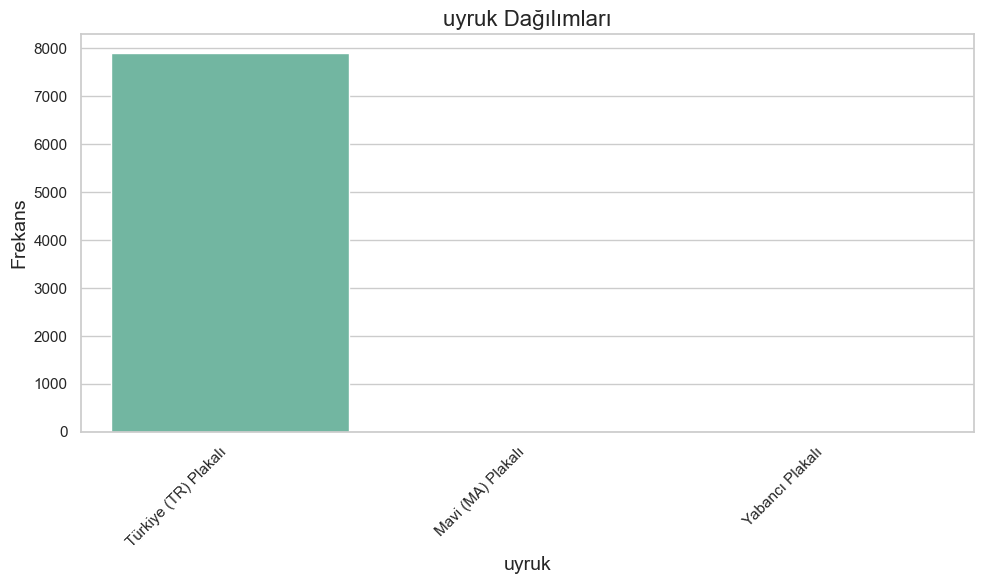

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


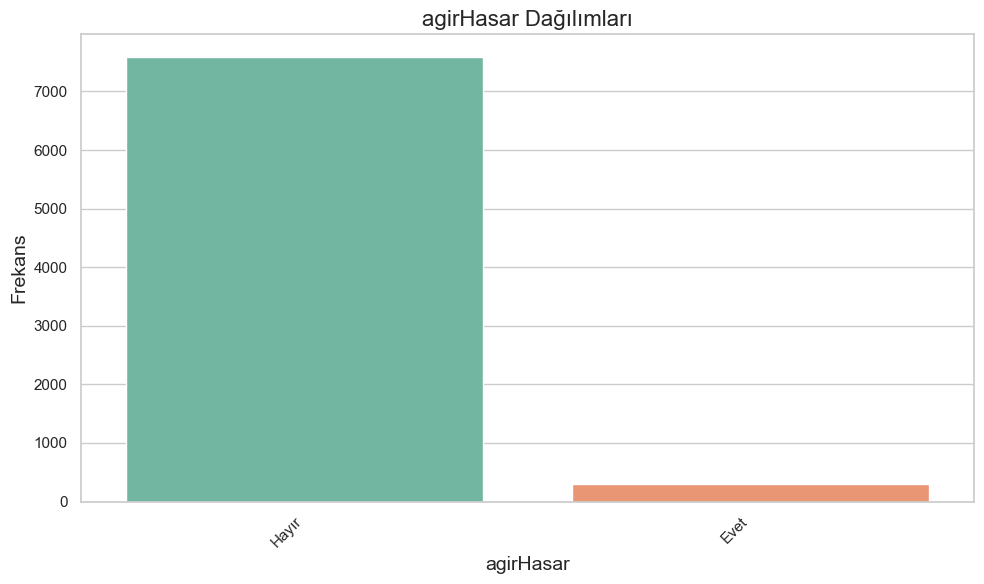

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


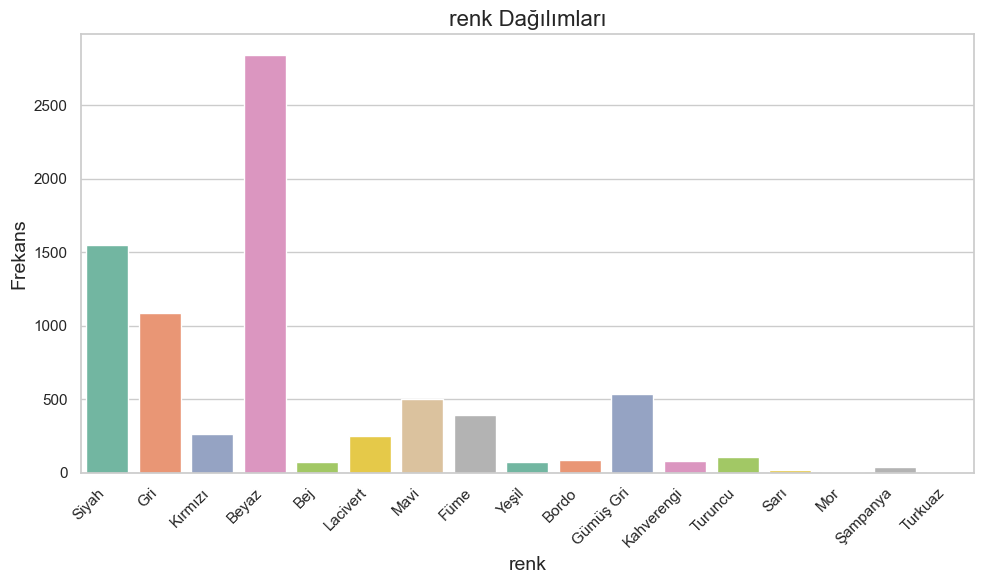

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


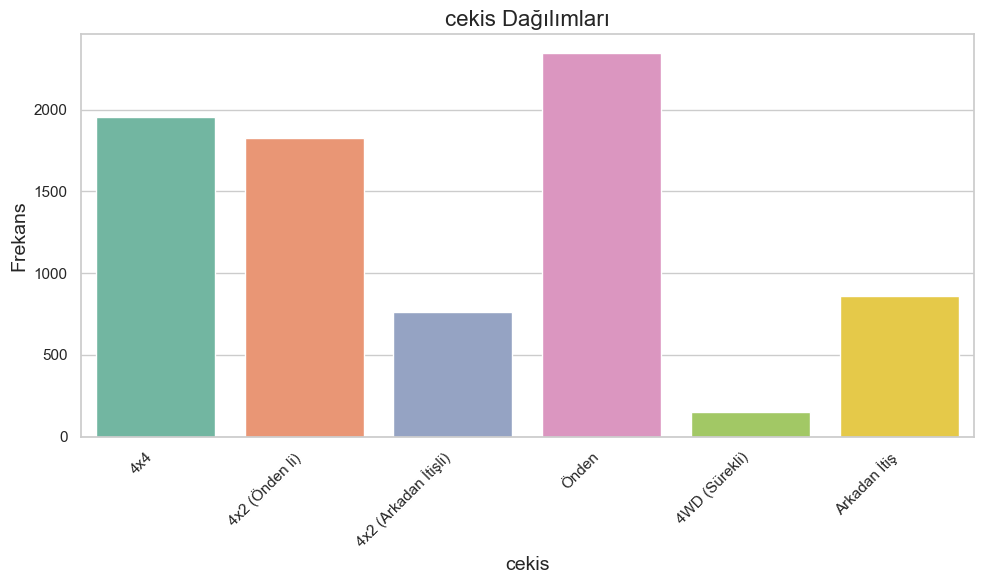

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


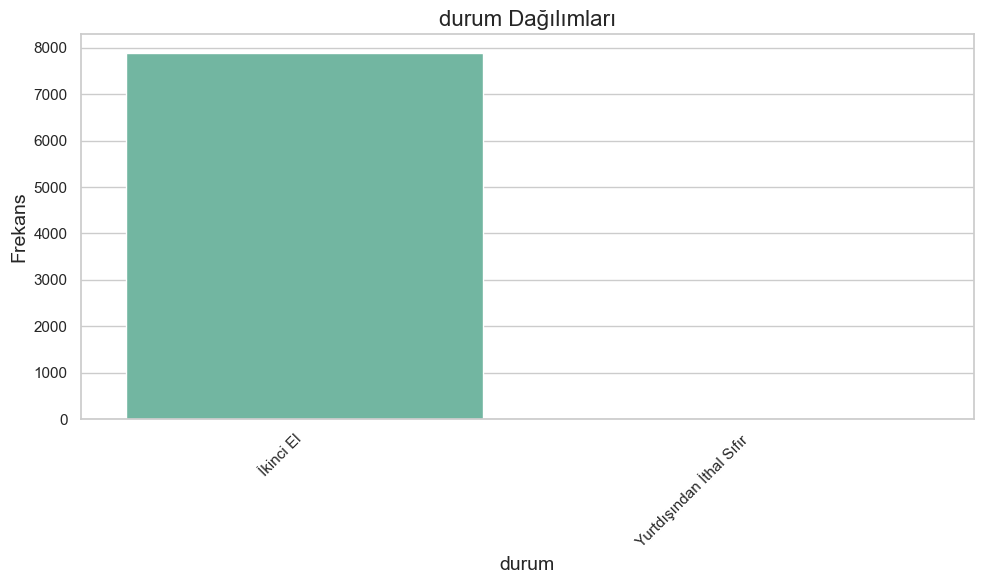

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


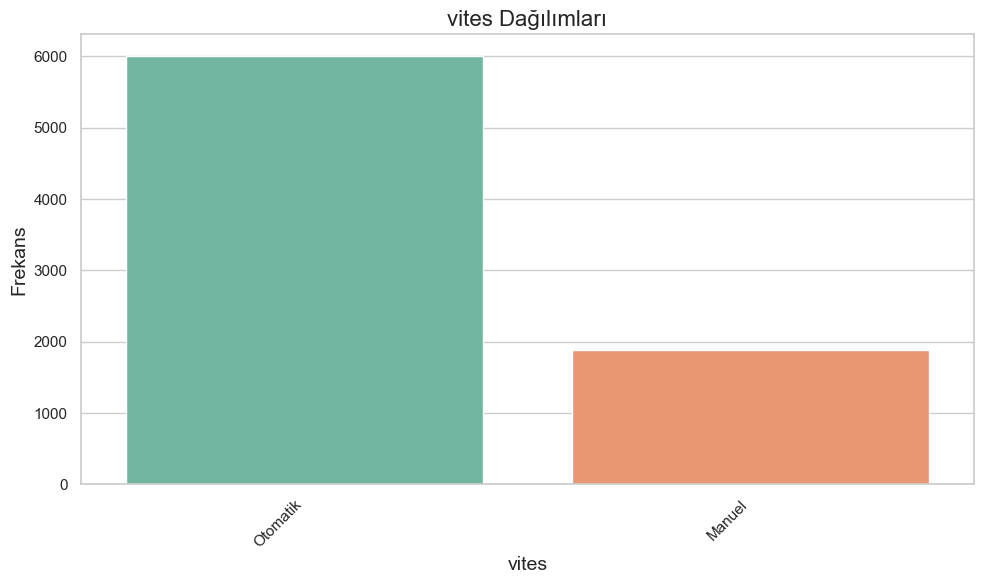

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


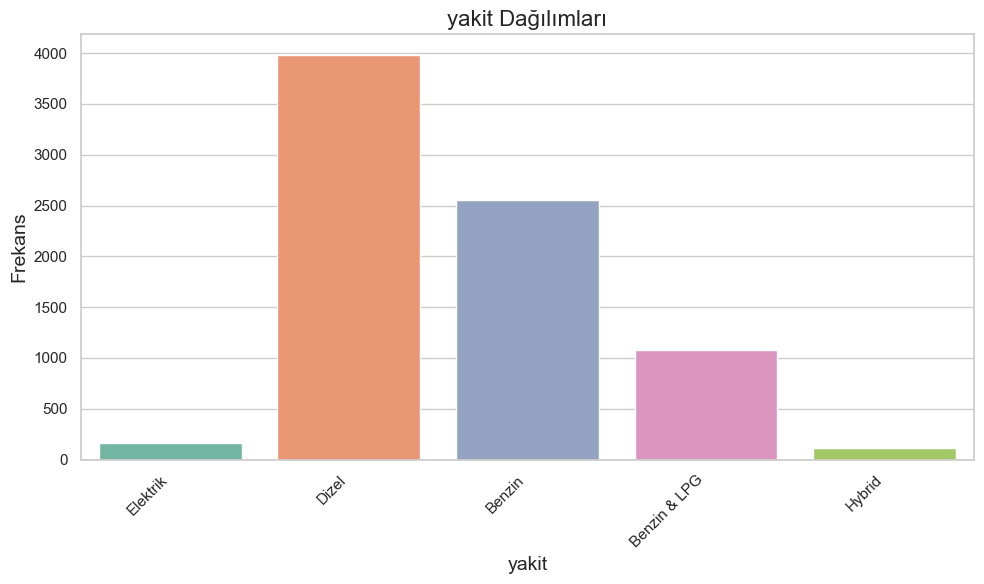

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


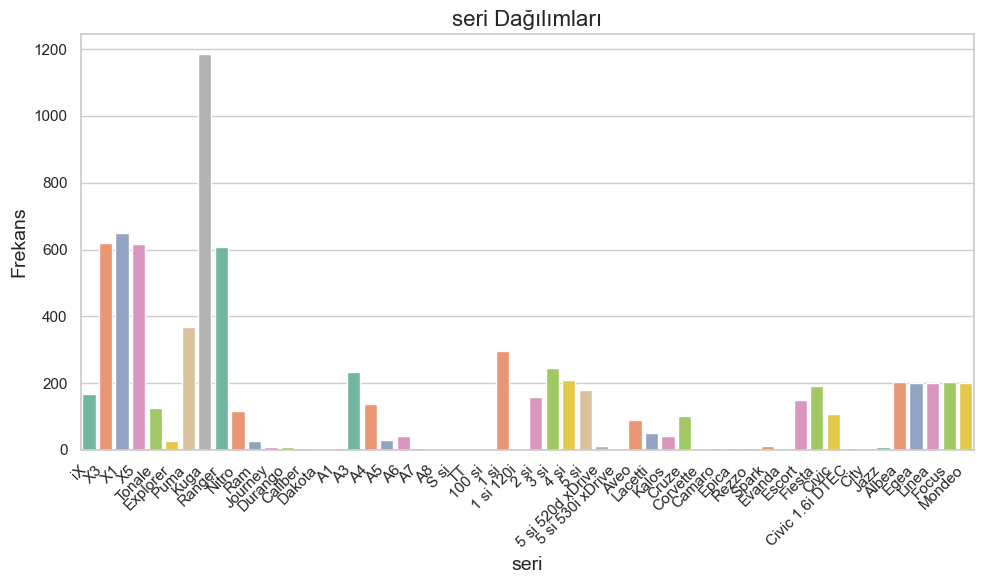

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


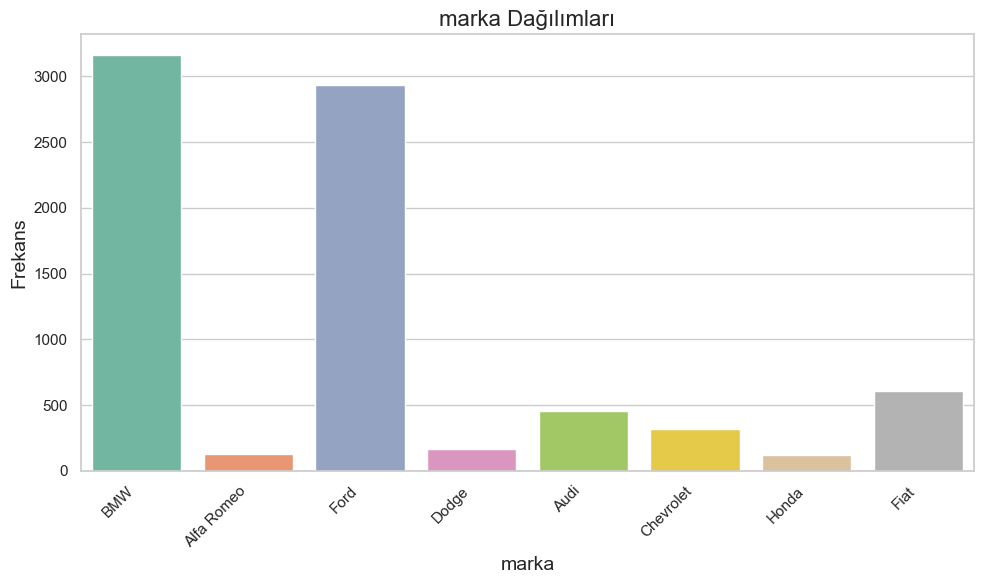

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


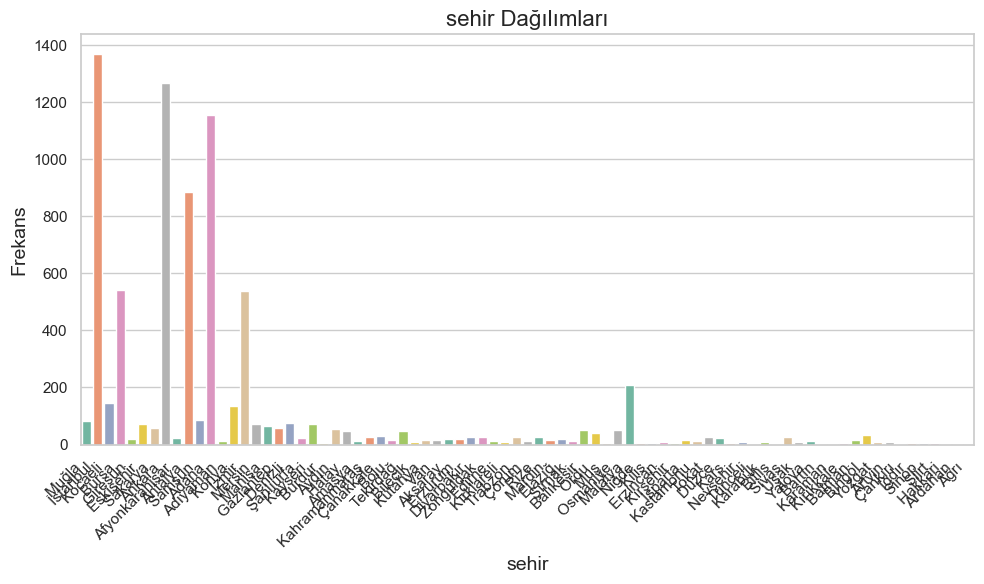

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\2583028471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


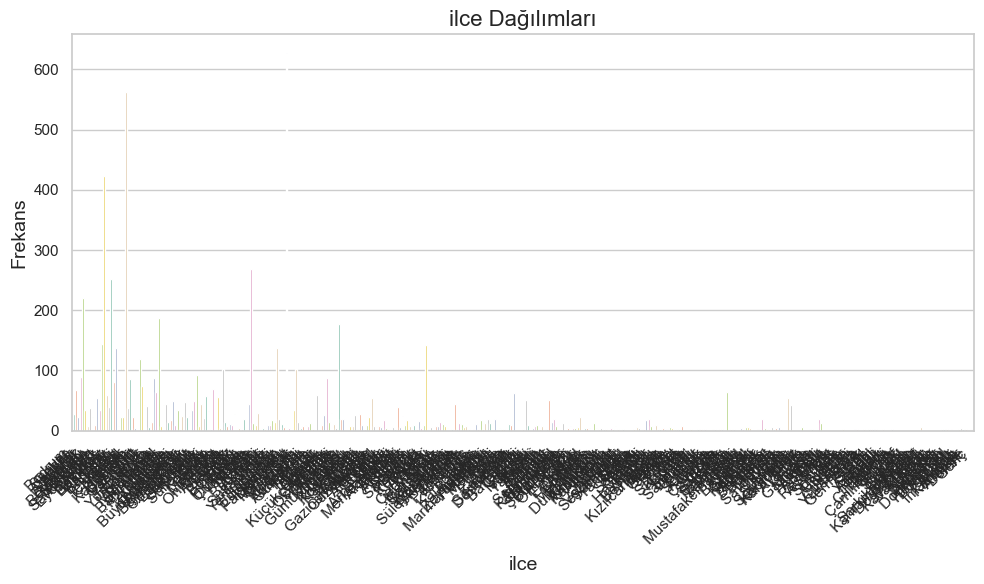

In [28]:
plot_categorical_distributions(araclar, categorical_columns)

## b) Correlation Matrix For Each Column

In [29]:
def plot_correlation_matrix(df):
     # Sayısal kolonları seç
    numerical_df = df.select_dtypes(include=['number'])
    
    # Korelasyon matrisini hesapla
    correlation_matrix = numerical_df.corr()
    
    # Korelasyon matrisini görselleştir
    plt.figure(figsize=(8,6))  # Grafik boyutları
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                cbar=True, linewidths=0.5, square=True, annot_kws={"size": 10, 'weight': 'bold'})
    
    # Başlık ve düzen
    plt.title('Sayısal Kolonlar Arası Korelasyon Matrisi', fontsize=16)
    plt.tight_layout()
    
    # Grafiği göster
    plt.show()

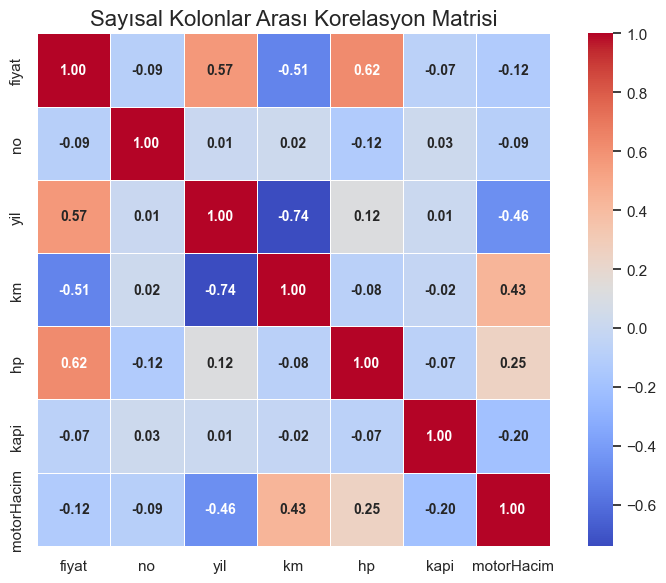

In [30]:
plot_correlation_matrix(araclar)

-> We can clearly see, there aren't any relationship between no-fiyat and kapi-fiyat. We are interesting relationships between fiyat and other column because at the end we want to predict fiyat.

## c) Model Distribution in Each Brand

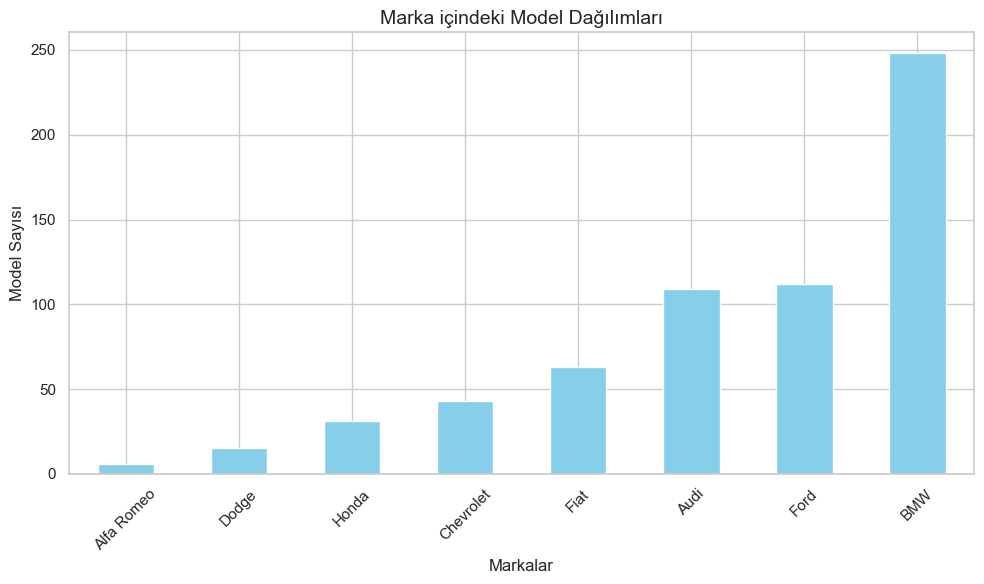

In [31]:
brands = araclar["marka"].unique()

# Marka ve model dağılımlarını gruplama
brand_model_counts = araclar.groupby('marka')['model'].nunique()

# Görselleştirme
plt.figure(figsize=(10, 6))
brand_model_counts.loc[brands].sort_values().plot(kind='bar', color='skyblue')
plt.title("Marka içindeki Model Dağılımları", fontsize=14)
plt.xlabel("Markalar", fontsize=12)
plt.ylabel("Model Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

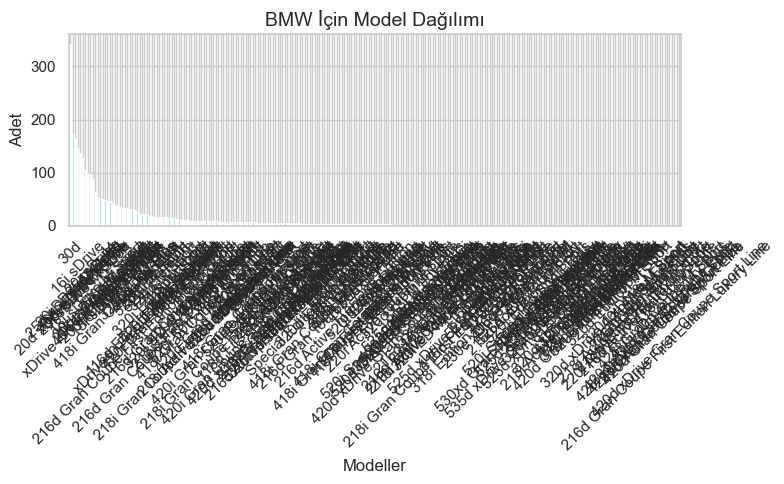

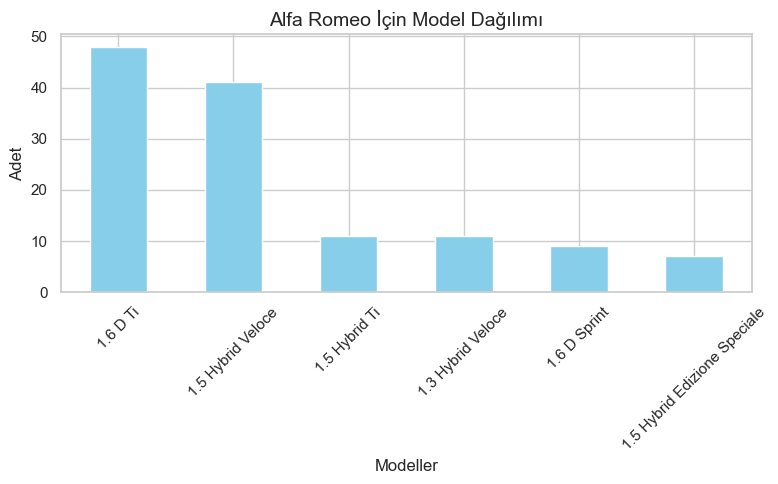

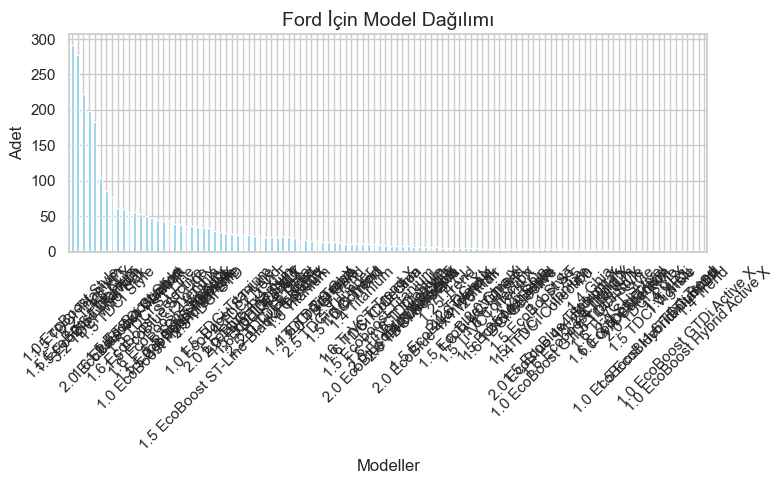

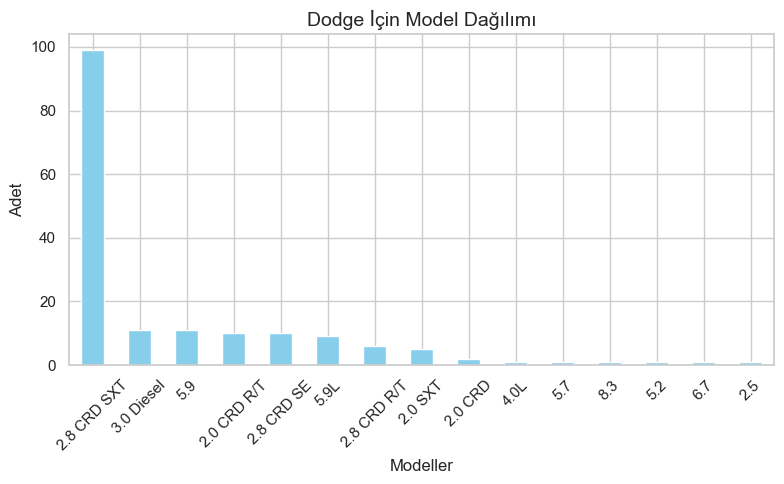

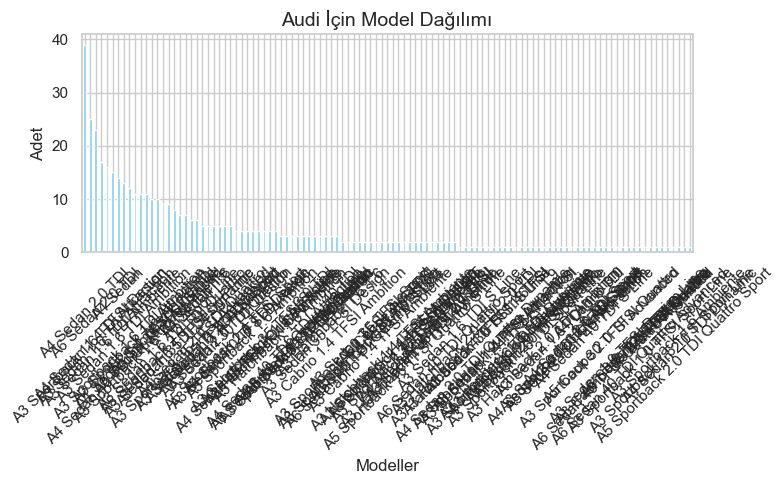

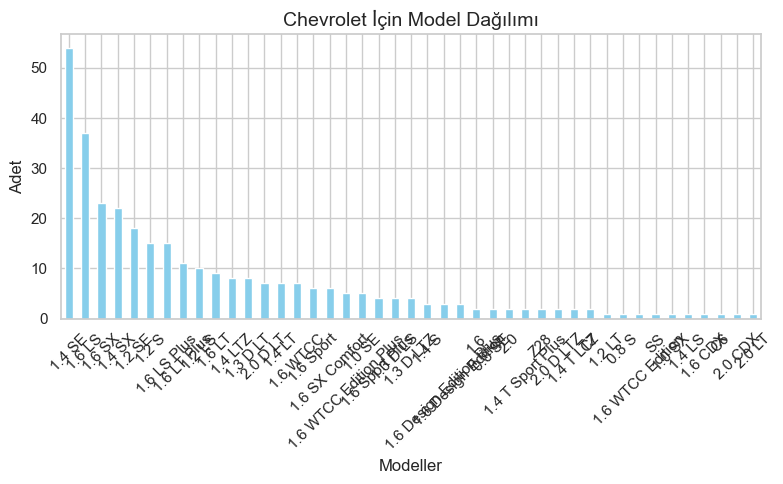

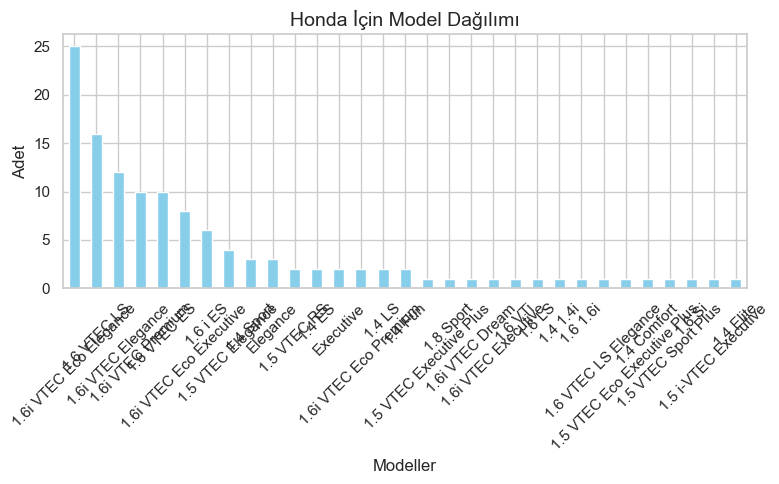

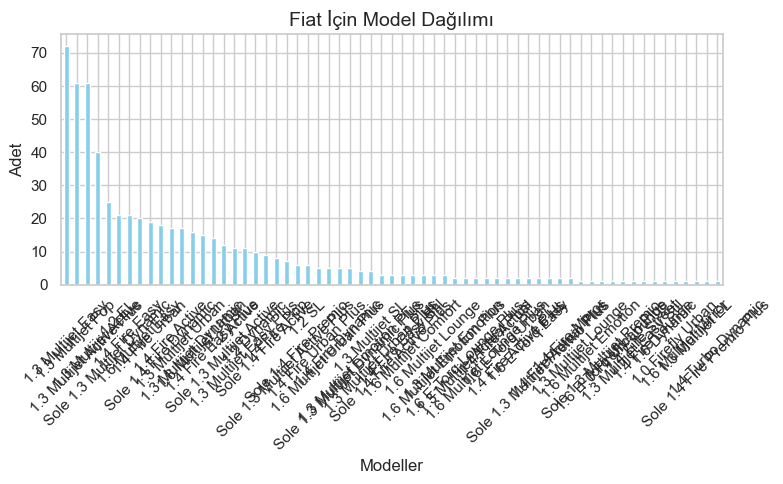

In [33]:
for brand in brands:
    # Verileri filtreleme
    brand_data = araclar[araclar['marka'] == brand]
    model_counts = brand_data['model'].value_counts()

    # Grafik oluşturma
    plt.figure(figsize=(8, 5))
    model_counts.plot(kind='bar', color='skyblue')
    plt.title(f"{brand} İçin Model Dağılımı", fontsize=14)
    plt.xlabel("Modeller", fontsize=12)
    plt.ylabel("Adet", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## d) Creating Submodel and Model for each row - EDA Operations

In [34]:
# Model frekanslarını hesaplama
model_counts = araclar.groupby(["seri",'marka', 'model']).size()

# 30'dan çok ve az olanları ayırma
low_count_models = model_counts[model_counts <= 30].reset_index(name='count')
high_count_models = model_counts[model_counts > 30].reset_index(name='count')

# `araclar2` (30'dan az veya eşit olanlar)
araclar2 = pd.merge(araclar, low_count_models[["seri",'marka', 'model']], on=["seri",'marka', 'model'])

# `arac` (30'dan çok olanlar)
arac = pd.merge(araclar, high_count_models[["seri",'marka', 'model']], on=["seri",'marka', 'model'])

# Sonuçları görüntüleme
print("araclar2 (30'dan az veya eşit):")
print(araclar2.shape)
print("\nArac (30'dan çok):")
print(arac.shape)

araclar2 (30'dan az veya eşit):
(3152, 24)

Arac (30'dan çok):
(4745, 24)


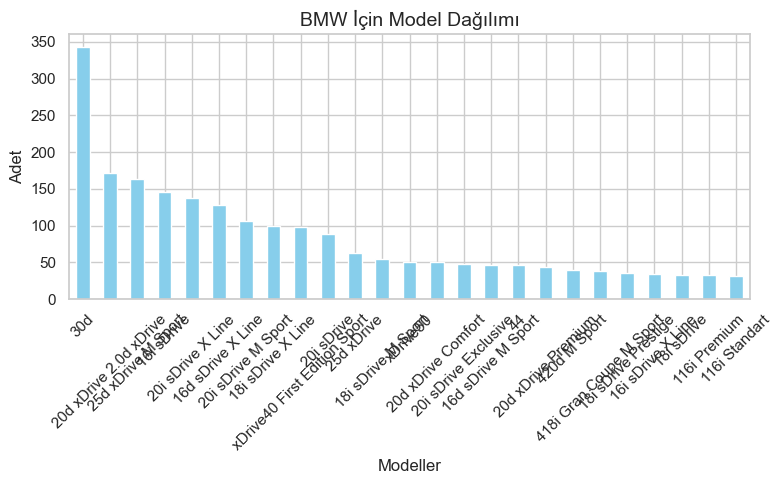

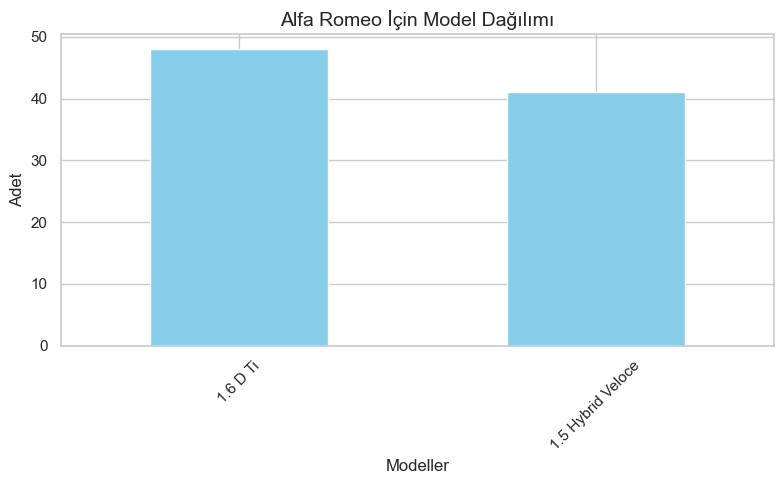

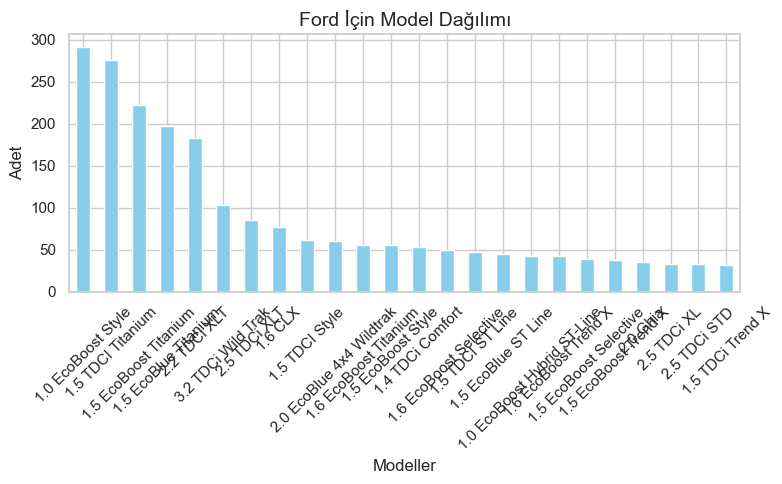

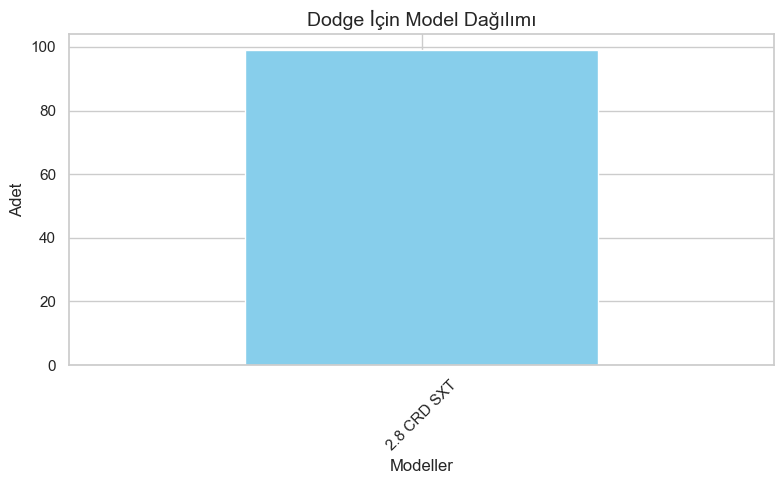

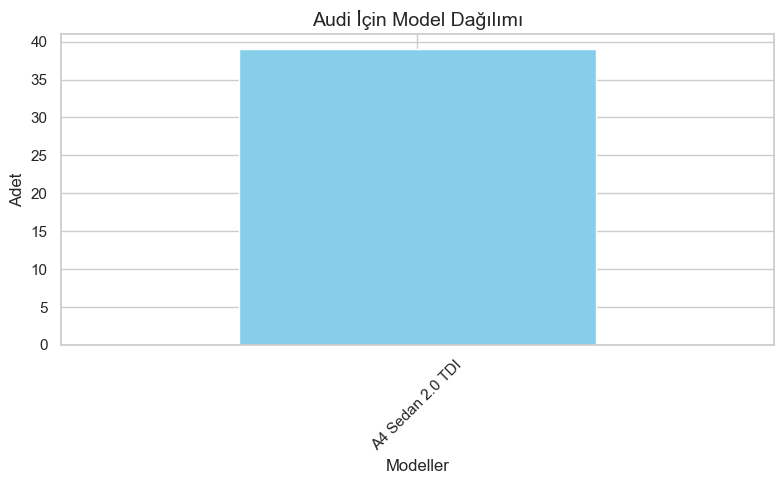

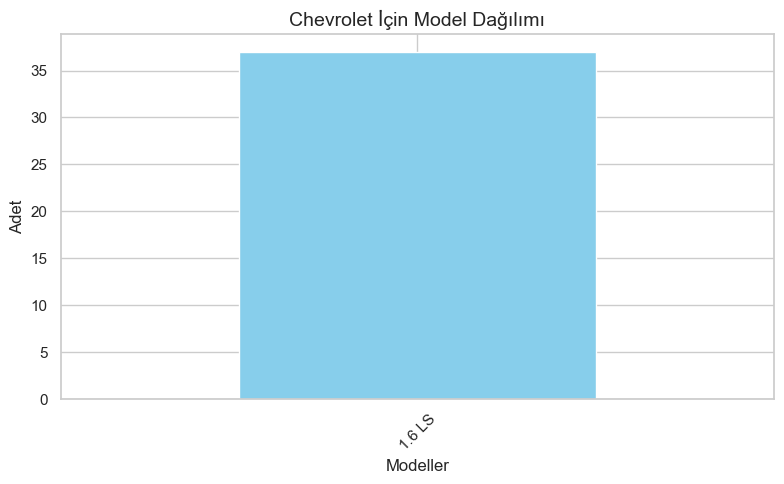

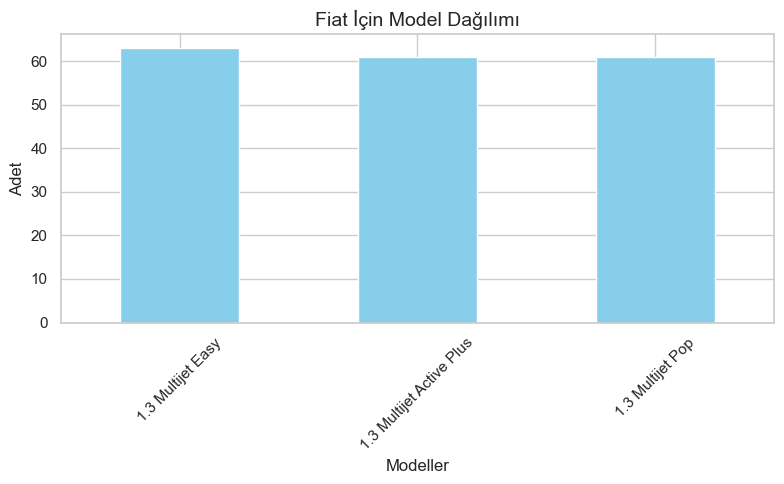

In [35]:
brands2 = arac["marka"].unique()
for brand in brands2:
    # Verileri filtreleme
    brand_data = arac[arac['marka'] == brand]
    model_counts = brand_data['model'].value_counts()

    # Grafik oluşturma
    plt.figure(figsize=(8, 5))
    model_counts.plot(kind='bar', color='skyblue')
    plt.title(f"{brand} İçin Model Dağılımı", fontsize=14)
    plt.xlabel("Modeller", fontsize=12)
    plt.ylabel("Adet", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
arac.shape

(4745, 24)

In [37]:
arac.to_csv("arac_bilgi.csv", index=False)

In [38]:
arac["marka"].unique()

array(['BMW', 'Alfa Romeo', 'Ford', 'Dodge', 'Audi', 'Chevrolet', 'Fiat'],
      dtype=object)

In [39]:
brand_data = arac[arac['marka'] == "Ford"]
model_counts = brand_data['model'].value_counts()
model_counts

model
1.0 EcoBoost Style             292
1.5 TDCI Titanium              276
1.5 EcoBoost Titanium          222
1.5 EcoBlue Titanium           197
2.2 TDCi XLT                   183
3.2 TDCi Wild Trak             104
2.5 TDCi XLT                    86
1.6 CLX                         77
1.5 TDCI Style                  62
2.0 EcoBlue 4x4 Wildtrak        60
1.6 EcoBoost Titanium           56
1.5 EcoBoost Style              56
1.4 TDCi Comfort                53
1.6 EcoBoost Selective          50
1.5 TDCI ST Line                48
1.5 EcoBlue ST Line             45
1.0 EcoBoost Hybrid ST-Line     43
1.6 EcoBoost Trend X            43
1.5 EcoBoost Selective          39
1.5 EcoBoost Trend X            38
2.0 Ghia                        35
2.5 TDCi XL                     33
2.5 TDCi STD                    33
1.5 TDCi Trend X                32
Name: count, dtype: int64

In [40]:
brand_data = arac[arac['marka'] == "BMW"]
model_counts = brand_data['model'].value_counts()
model_counts

model
30d                             343
20d xDrive 2.0d xDrive          172
25d xDrive M Sport              164
16i sDrive                      146
20i sDrive X Line               138
16d sDrive X Line               128
20i sDrive M Sport              106
18i sDrive X Line                99
xDrive40 First Edition Sport     98
20i sDrive                       89
25d xDrive                       63
18i sDrive M Sport               54
xDrive50                         50
20d xDrive Comfort               50
20i sDrive Exclusive             48
16d sDrive M Sport               47
44                               47
20d xDrive Premium               44
420d M Sport                     40
418i Gran Coupe M Sport          39
18i sDrive Prestige              36
16i sDrive X Line                34
18i sDrive                       33
116i Premium                     33
116i Standart                    32
Name: count, dtype: int64

In [41]:
bmw_model = ["30d", "20d xDrive", "25d xDrive", "16i sDrive", "20i sDrive", "16d sDrive", "18i sDrive", "116i", "420d", "xDrive40", 
             "xDrive50", "44", "418i Gran Coupe"]
fiat_model = ["1.3 Multijet"]
ford_model = ["1.0 EcoBoost", "1.5 TDCI", "1.5 EcoBoost", "2.2 TDCi", "3.2 TDCi", "2.5 TDCi", "1.6 CLX", "2.0 EcoBlue", "1.6 EcoBoost", 
              "1.5 EcoBoost", "1.4 TDCİ", "1.6 EcoBoost", "1.5 EcoBlue", "1.0 EcoBoost","1.5 TDCi", "1.6 TDCI", "2.0 Ghia", "2.5 TDCi" ]
alfa_romeo_model = ["1.6 D", "1.5 Hybrid"]
dodge_model=[ "2.8 CRD"]
audi_model = ["A4 Sedan"]
chevrolet_model = ["1.6", "1.4"]

In [42]:
brand_data = arac[arac['marka'] == "BMW"]
model_counts = brand_data['model']
print("...Tüm BMW modelleri...")
model_counts.unique()

...Tüm BMW modelleri...


array(['xDrive50', 'xDrive40 First Edition Sport',
       '20d xDrive 2.0d xDrive', '20d xDrive Comfort',
       '20d xDrive Premium', '16d sDrive M Sport', '16d sDrive X Line',
       '16i sDrive', '16i sDrive X Line', '18i sDrive',
       '18i sDrive M Sport', '18i sDrive X Line', '18i sDrive Prestige',
       '20i sDrive X Line', '20i sDrive M Sport', '20i sDrive',
       '20i sDrive Exclusive', '25d xDrive', '25d xDrive M Sport', '30d',
       '44', '116i Premium', '116i Standart', '420d M Sport',
       '418i Gran Coupe M Sport'], dtype=object)

In [43]:
brand_data = arac[arac['marka'] == "Fiat"]
model_counts = brand_data['model']
print("...Tüm Fiat modelleri...")
model_counts.unique()

...Tüm Fiat modelleri...


array(['1.3 Multijet Easy', '1.3 Multijet Active Plus',
       '1.3 Multijet Pop'], dtype=object)

In [44]:
brand_data = arac[arac['marka'] == "Ford"]
model_counts = brand_data['model']
print("...Tüm Ford modelleri...")
model_counts.unique()

...Tüm Ford modelleri...


array(['1.0 EcoBoost Style', '1.0 EcoBoost Hybrid ST-Line',
       '1.5 TDCI Titanium', '1.5 TDCI Style', '1.5 TDCI ST Line',
       '1.5 EcoBlue ST Line', '1.5 EcoBlue Titanium',
       '1.5 EcoBoost Selective', '1.5 EcoBoost Style',
       '1.5 EcoBoost Trend X', '1.5 EcoBoost Titanium',
       '1.6 EcoBoost Selective', '1.6 EcoBoost Titanium',
       '1.6 EcoBoost Trend X', '2.0 EcoBlue 4x4 Wildtrak', '2.2 TDCi XLT',
       '2.5 TDCi XLT', '3.2 TDCi Wild Trak', '2.5 TDCi XL',
       '2.5 TDCi STD', '1.6 CLX', '1.4 TDCi Comfort', '1.5 TDCi Trend X',
       '2.0 Ghia'], dtype=object)

In [45]:
def split_model_by_brand(df, marka, ust_model_listesi):
    """
    Belirtilen marka için üst ve alt modelleri ayırır ve yeni bir DataFrame döndürür.
    
    Args:
        df (DataFrame): Orijinal veri seti.
        marka (str): İşlem yapılacak marka adı.
        ust_model_listesi (list): Markanın üst model isimleri.
    
    Returns:
        DataFrame: Üst ve alt modellerin ayrıldığı yeni bir DataFrame.
    """
    # Marka filtreleme
    marka_df = df[df["marka"] == marka].copy()
    
    # Model ayrımı fonksiyonu
    def model_duzenle(row):
        for ust_model in ust_model_listesi:
            if row.startswith(ust_model):  # Üst model ile başlıyorsa
                alt_model = row.replace(ust_model, '').strip()  # Üst modeli çıkar
                return pd.Series([ust_model, alt_model if alt_model else '0'])
        return pd.Series([None, row])  # Hiçbir eşleşme yoksa

    # Ayrım işlemi ve yeni sütunlar
    marka_df[['ust_model', 'alt_model']] = marka_df['model'].apply(model_duzenle)
    
    marka_df.drop(columns=["model"], inplace=True)
    return marka_df

In [46]:
split_alfa_romeo = split_model_by_brand(arac, "Alfa Romeo", alfa_romeo_model)
split_dodge= split_model_by_brand(arac, "Dodge", dodge_model)
split_chevrolet = split_model_by_brand(arac, "Chevrolet", chevrolet_model)
split_audi = split_model_by_brand(arac, "Audi", audi_model)

In [47]:
split_bmw = split_model_by_brand(arac, "BMW", bmw_model)
split_bmw.T

,0,1,2,3,4,5,6,7,8,9,...,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325
fiyat,5100000,4970000,6350000,4585000,5244400,5130000,5000000,5750000,5550000,5668800,...,1270000,1225000,1545000,1535000,1450000,1350000,1435000,1649000,1635000,1560000
no,1213575242,1195328689,1161113579,1201285129,1161296709,1213845422,1194197880,1071639497,1210953754,1213903200,...,1209268032,1171502017,1189789706,1205479053,1209059156,1075717781,1209025453,1194262363,1179647631,1126475881
ilanTarihi,26 Kasım 2024,02 Aralık 2024,01 Aralık 2024,01 Aralık 2024,28 Kasım 2024,28 Kasım 2024,30 Kasım 2024,27 Kasım 2024,29 Kasım 2024,28 Kasım 2024,...,06 Kasım 2024,06 Kasım 2024,06 Kasım 2024,05 Kasım 2024,05 Kasım 2024,04 Kasım 2024,05 Kasım 2024,04 Kasım 2024,04 Kasım 2024,16 Eylül 2024
marka,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
seri,iX,iX,iX,iX,iX,iX,iX,iX,iX,iX,...,4 si,4 si,4 si,4 si,4 si,4 si,4 si,4 si,4 si,4 si
yil,2022,2023,2023,2023,2022,2023,2023,2022,2023,2023,...,2016,2016,2017,2016,2016,2015,2015,2018,2017,2015
yakit,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,...,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin
vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,...,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik
durum,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,...,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El
km,48900,51117,11000,6001,7500,17500,27000,12000,18155,6200,...,182000,130000,132000,108000,155000,150000,139000,154000,103000,75000


In [48]:
split_ford = split_model_by_brand(arac, "Ford", ford_model)
split_ford.T

,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,...,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744
fiyat,1155000,1019000,1189750,1300000,1295000,1275000,1197500,1025000,1104950,1100000,...,305000,260000,250000,275000,355000,318000,251000,389750,275000,280000
no,1208804324,1200005175,1203203127,1208940088,1208925555,1208898528,1208893474,1208861369,1198748188,1182712101,...,1214059492,1214271382,1198456695,1194460495,1213811378,1213762742,1207439195,1210188503,1213380483,1213375752
ilanTarihi,04 Kasım 2024,01 Kasım 2024,09 Ekim 2024,04 Kasım 2024,04 Kasım 2024,04 Kasım 2024,04 Kasım 2024,04 Kasım 2024,04 Kasım 2024,04 Kasım 2024,...,29 Kasım 2024,30 Kasım 2024,28 Kasım 2024,28 Kasım 2024,28 Kasım 2024,27 Kasım 2024,28 Kasım 2024,26 Kasım 2024,25 Kasım 2024,25 Kasım 2024
marka,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,...,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford
seri,Puma,Puma,Puma,Puma,Puma,Puma,Puma,Puma,Puma,Puma,...,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo,Mondeo
yil,2022,2021,2023,2021,2023,2023,2023,2023,2021,2023,...,2002,1997,1997,2004,2007,2002,2000,2002,1997,2000
yakit,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,Benzin,...,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG
vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Manuel,Otomatik,Otomatik,...,Manuel,Manuel,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Manuel,Manuel
durum,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,...,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El
km,17589,114000,50000,37000,9507,15000,16000,10000,51000,36618,...,381000,280000,245000,317000,330000,258000,282000,240000,371000,365000


In [49]:
split_fiat = split_model_by_brand(arac, "Fiat", fiat_model)
split_fiat.T

,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,...,4668,4669,4670,4671,4672,4673,4674,4675,4676,4677
fiyat,788500,688500,520000,520000,765000,743500,570000,565000,665000,635000,...,458500,399000,475000,548500,259000,505000,620000,417000,496500,565000
no,1215641989,1215638194,1212423923,1212423923,1212269394,1214904482,1214800195,1214684944,1215786360,1203125850,...,1214069909,1214058887,1194143346,1214214562,1052150104,1214011374,1213980182,1214306888,1169955668,1213901744
ilanTarihi,07 Aralık 2024,07 Aralık 2024,05 Aralık 2024,05 Aralık 2024,04 Aralık 2024,03 Aralık 2024,03 Aralık 2024,02 Aralık 2024,08 Aralık 2024,08 Aralık 2024,...,29 Kasım 2024,29 Kasım 2024,29 Kasım 2024,30 Kasım 2024,29 Kasım 2024,29 Kasım 2024,28 Kasım 2024,30 Kasım 2024,07 Aralık 2024,28 Kasım 2024
marka,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,...,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat,Fiat
seri,Egea,Egea,Egea,Egea,Egea,Egea,Egea,Egea,Egea,Egea,...,Linea,Linea,Linea,Linea,Linea,Linea,Linea,Linea,Linea,Linea
yil,2022,2020,2016,2016,2022,2022,2019,2017,2018,2019,...,2016,2014,2014,2015,2015,2012,2017,2015,2017,2017
yakit,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,...,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel,Dizel
vites,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,...,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel,Manuel
durum,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,...,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El
km,25000,88000,227500,227500,60000,90000,164000,173500,153400,129500,...,229000,160000,240000,175000,145000,225000,105000,176000,346000,188000


In [50]:
brand_splitted = pd.concat([split_bmw, split_fiat, split_ford, split_audi, split_alfa_romeo, split_dodge, split_chevrolet], ignore_index=True)

In [51]:
brand_splitted.shape

(4745, 25)

In [52]:
brand_splitted.T

,0,1,2,3,4,5,6,7,8,9,...,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744
fiyat,5100000,4970000,6350000,4585000,5244400,5130000,5000000,5750000,5550000,5668800,...,489999,485000,515000,615000,515000,575000,495000,420000,503000,575000
no,1213575242,1195328689,1161113579,1201285129,1161296709,1213845422,1194197880,1071639497,1210953754,1213903200,...,1202978643,1202780624,1179006618,1205088766,1202895848,1201877056,1186822275,1206029522,1204186285,1171658480
ilanTarihi,26 Kasım 2024,02 Aralık 2024,01 Aralık 2024,01 Aralık 2024,28 Kasım 2024,28 Kasım 2024,30 Kasım 2024,27 Kasım 2024,29 Kasım 2024,28 Kasım 2024,...,08 Ekim 2024,07 Ekim 2024,24 Ekim 2024,17 Ekim 2024,08 Ekim 2024,02 Kasım 2024,25 Ekim 2024,21 Ekim 2024,14 Ekim 2024,12 Ekim 2024
marka,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,...,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet,Chevrolet
seri,iX,iX,iX,iX,iX,iX,iX,iX,iX,iX,...,Cruze,Cruze,Cruze,Cruze,Cruze,Cruze,Cruze,Cruze,Cruze,Cruze
yil,2022,2023,2023,2023,2022,2023,2023,2022,2023,2023,...,2010,2010,2010,2010,2010,2011,2010,2010,2010,2011
yakit,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,Elektrik,...,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG,Benzin & LPG
vites,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,Otomatik,...,Manuel,Manuel,Manuel,Otomatik,Otomatik,Otomatik,Otomatik,Manuel,Manuel,Manuel
durum,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,...,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El,İkinci El
km,48900,51117,11000,6001,7500,17500,27000,12000,18155,6200,...,232000,170000,136000,97000,151500,105000,207500,280000,166000,105000


In [53]:
brand_splitted['ust_model'] = brand_splitted['ust_model'].fillna("0")

## e) Visualization for Feature Extraction

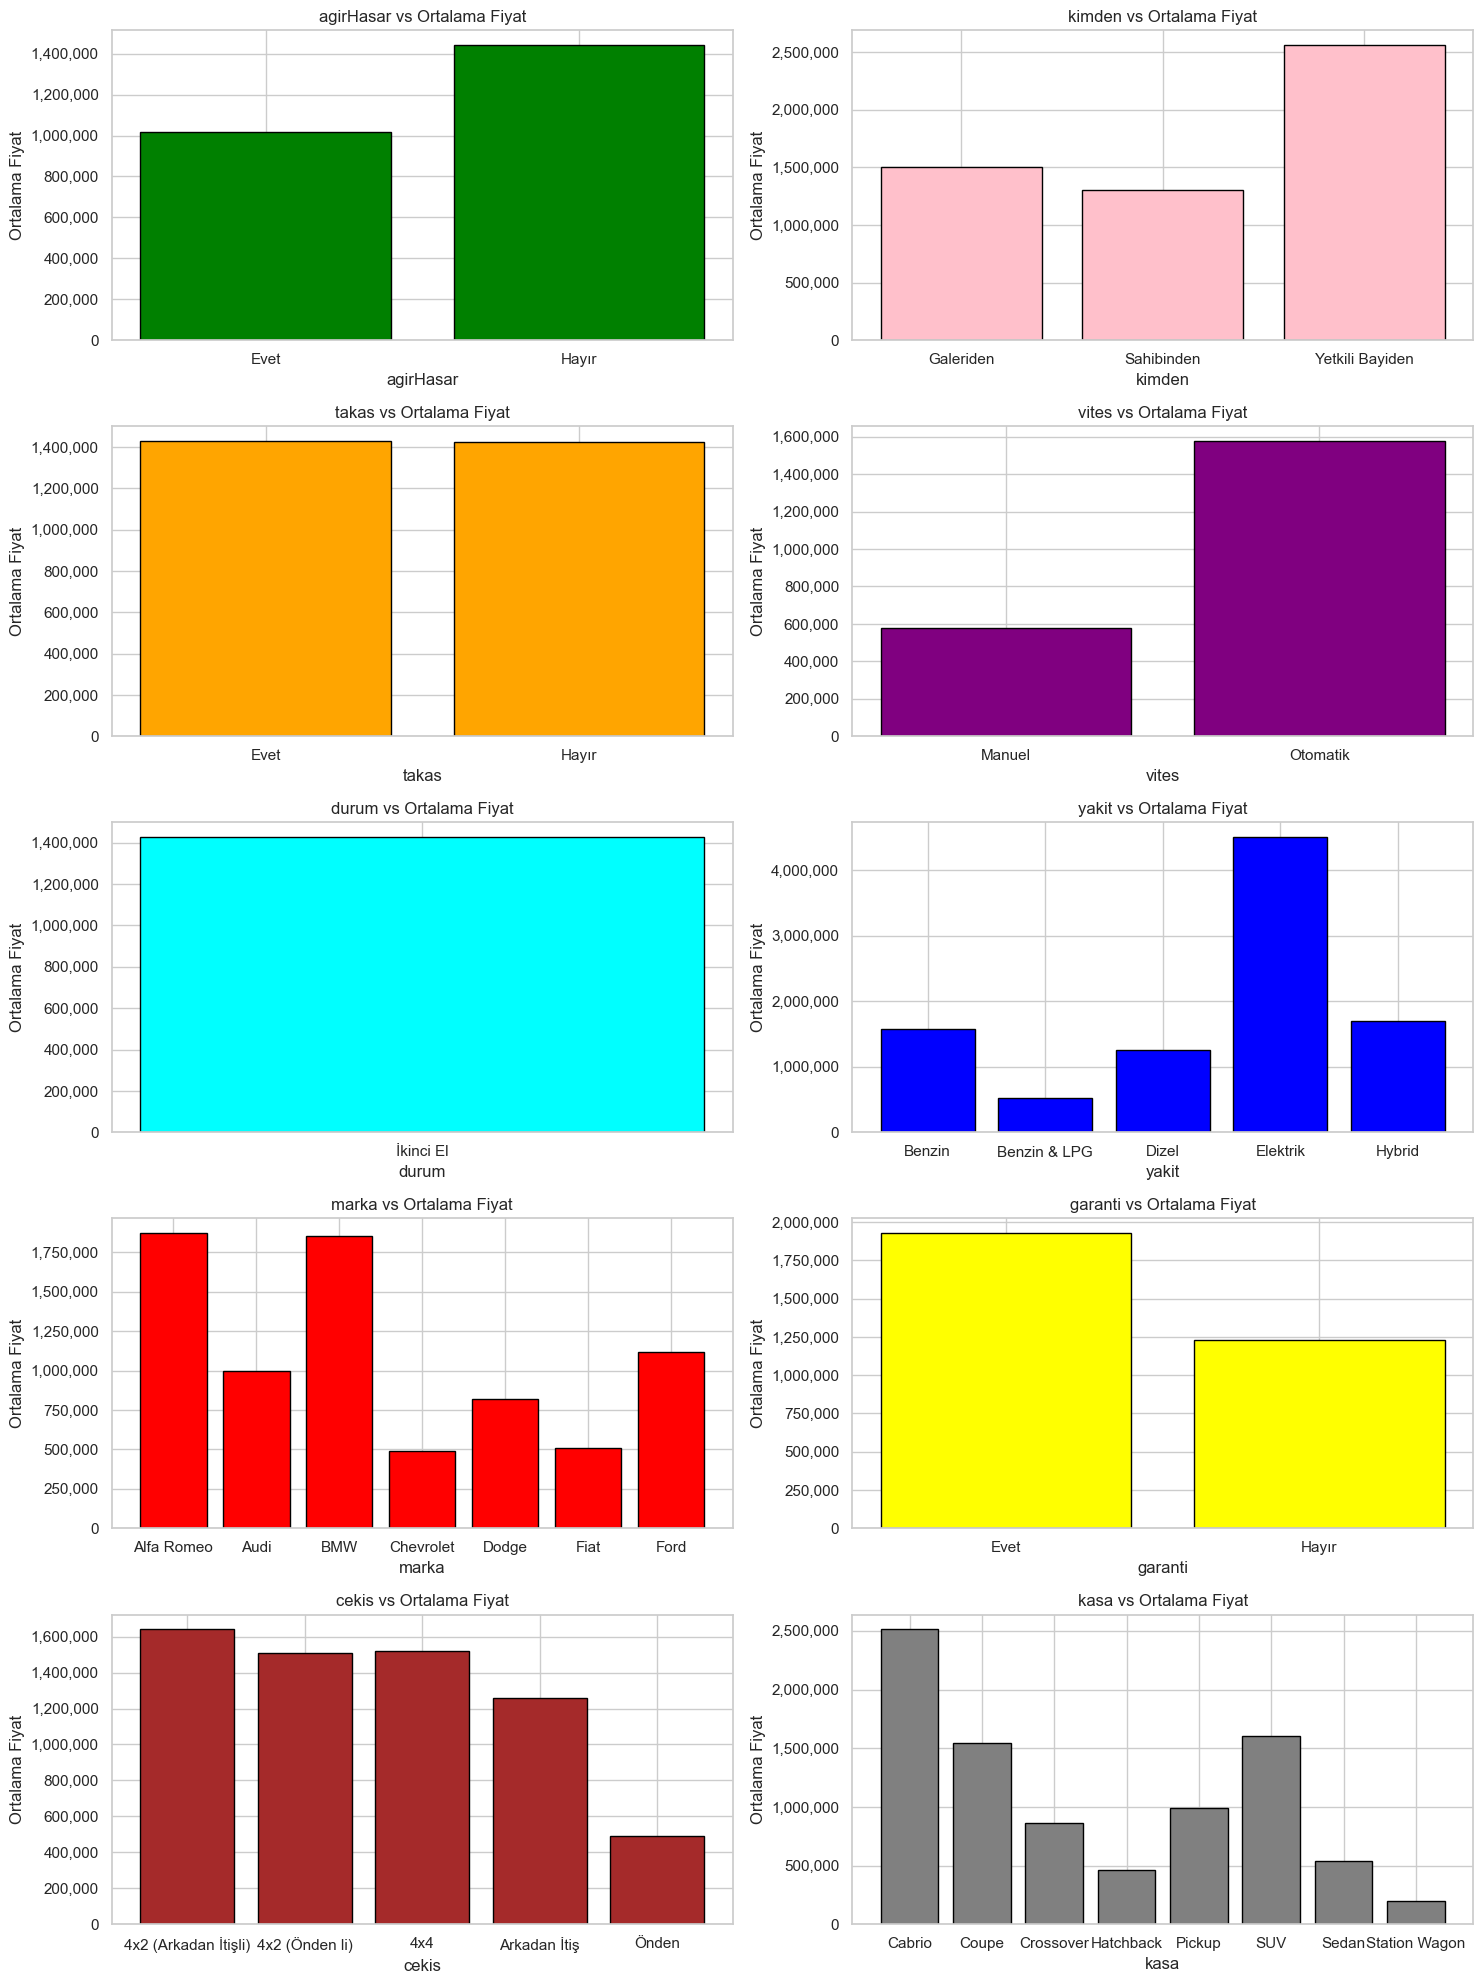

In [54]:

# Grafik için alt figür ayarlaması
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# List of columns to analyze
columns_to_analyze = ['agirHasar', 'kimden', 'takas', 'vites', 'durum', 'yakit', 'marka', 'garanti', 'cekis', 'kasa']

# Renk seçenekleri
colors = ['green', 'pink', 'orange', 'purple', 'cyan', 'blue', 'red', 'yellow', 'brown', 'gray']

# Her bir kolon için ortalama fiyatı hesapla ve grafikleri oluştur
for i, col in enumerate(columns_to_analyze):
    row = i // 2
    col_pos = i % 2
    
    # Kategorilere göre fiyatın ortalamasını al
    avg_price = brand_splitted.groupby(col)['fiyat'].mean()
    
    # Bar grafiğini çiz, her grafikte farklı renk
    axs[row, col_pos].bar(avg_price.index, avg_price.values, color=colors[i], edgecolor='black')
    
    # Başlık, etiketler ve formatlama
    axs[row, col_pos].set_title(f'{col} vs Ortalama Fiyat')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('Ortalama Fiyat')
    axs[row, col_pos].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Düzenlemeleri yap
plt.tight_layout()
plt.show()

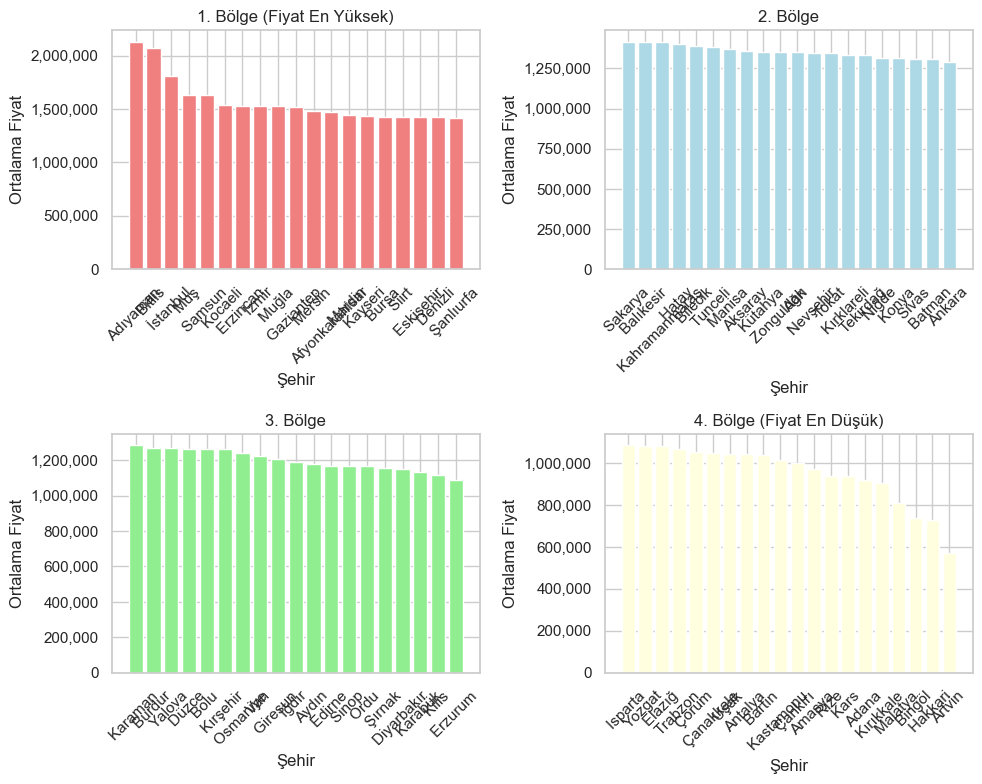

In [55]:
# Şehir türüne göre gruplama ve ortalama fiyat hesaplama
ortalama_fiyat_sehir = brand_splitted.groupby("sehir")["fiyat"].mean()

# Şehirleri fiyatlarına göre sırala
ortalama_fiyat_sehir = ortalama_fiyat_sehir.sort_values(ascending=False)

# Fiyatları 4 gruba ayırma
n = len(ortalama_fiyat_sehir)
grup_bir = ortalama_fiyat_sehir[:n//4]  # 1. grup
grup_iki = ortalama_fiyat_sehir[n//4:n//2]  # 2. grup
grup_uc = ortalama_fiyat_sehir[n//2:3*n//4]  # 3. grup
grup_dort = ortalama_fiyat_sehir[3*n//4:]  # 4. grup

# Her grup için ayrı bar grafiği oluşturma
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


# 1. grup grafiği
axs[0, 0].bar(grup_bir.index, grup_bir.values, color='lightcoral')
axs[0, 0].set_title('1. Bölge (Fiyat En Yüksek)')
axs[0, 0].set_xlabel('Şehir')
axs[0, 0].set_ylabel('Ortalama Fiyat')
axs[0, 0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[0, 0].tick_params(axis='x', rotation=45)  # X eksenindeki etiketleri 45 derece döndür

# 2. grup grafiği
axs[0, 1].bar(grup_iki.index, grup_iki.values, color='lightblue')
axs[0, 1].set_title('2. Bölge')
axs[0, 1].set_xlabel('Şehir')
axs[0, 1].set_ylabel('Ortalama Fiyat')
axs[0, 1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. grup grafiği
axs[1, 0].bar(grup_uc.index, grup_uc.values, color='lightgreen')
axs[1, 0].set_title('3. Bölge')
axs[1, 0].set_xlabel('Şehir')
axs[1, 0].set_ylabel('Ortalama Fiyat')
axs[1, 0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. grup grafiği
axs[1, 1].bar(grup_dort.index, grup_dort.values, color='lightyellow')
axs[1, 1].set_title('4. Bölge (Fiyat En Düşük)')
axs[1, 1].set_xlabel('Şehir')
axs[1, 1].set_ylabel('Ortalama Fiyat')
axs[1, 1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[1, 1].tick_params(axis='x', rotation=45)

# Düzenlemeleri yap
plt.tight_layout()
plt.show()

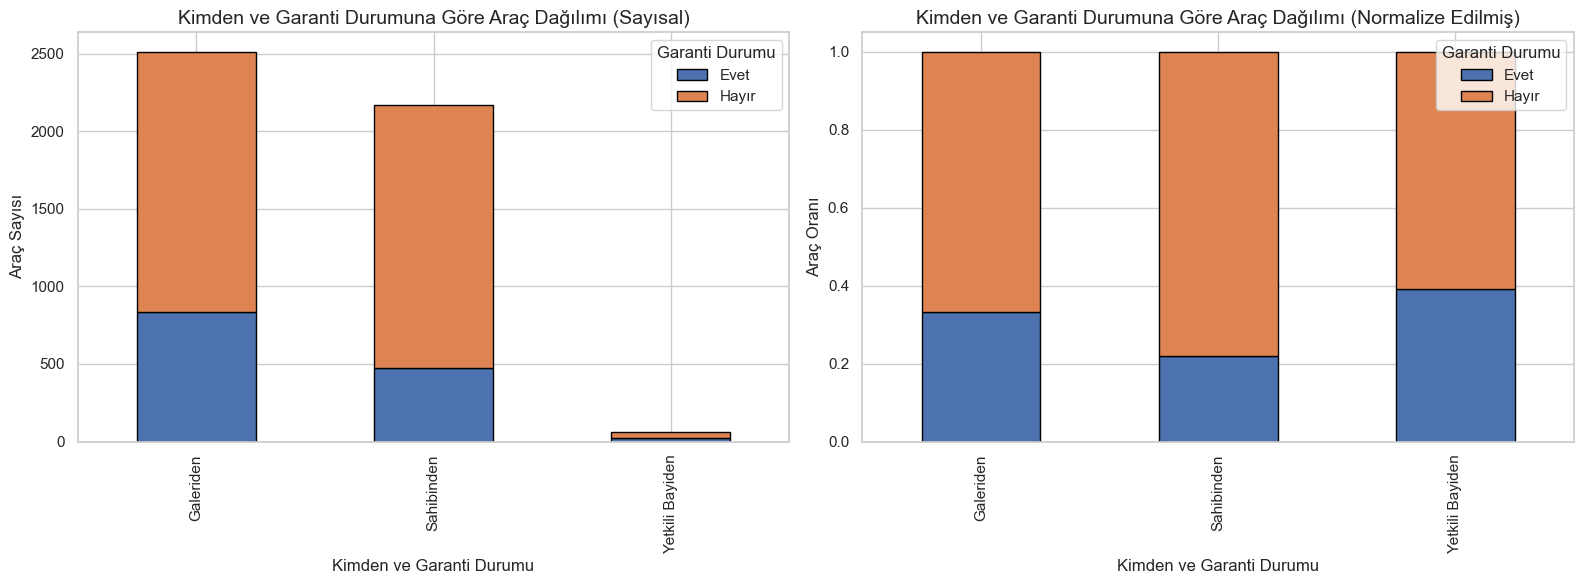

In [56]:
# Kimden ve garanti durumuna göre dağılım (sayısal değerler)
garanti_counts = brand_splitted.groupby(['kimden', 'garanti']).size().unstack(fill_value=0)

# Normalize etme: her grubun toplamına bölme
garanti_counts_normalized = garanti_counts.div(garanti_counts.sum(axis=1), axis=0)

# Grafik oluştur (sayısal değerler ile)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sayısal değerlerin bar grafiği
garanti_counts.plot(kind='bar', stacked=True, ax=axes[0], edgecolor='black')
axes[0].set_title('Kimden ve Garanti Durumuna Göre Araç Dağılımı (Sayısal)', fontsize=14)
axes[0].set_xlabel('Kimden ve Garanti Durumu', fontsize=12)
axes[0].set_ylabel('Araç Sayısı', fontsize=12)
axes[0].legend(title='Garanti Durumu')

# Normalize edilmiş değerlerin bar grafiği
garanti_counts_normalized.plot(kind='bar', stacked=True, ax=axes[1], edgecolor='black')
axes[1].set_title('Kimden ve Garanti Durumuna Göre Araç Dağılımı (Normalize Edilmiş)', fontsize=14)
axes[1].set_xlabel('Kimden ve Garanti Durumu', fontsize=12)
axes[1].set_ylabel('Araç Oranı', fontsize=12)
axes[1].legend(title='Garanti Durumu')

# Göster
plt.tight_layout()
plt.show()

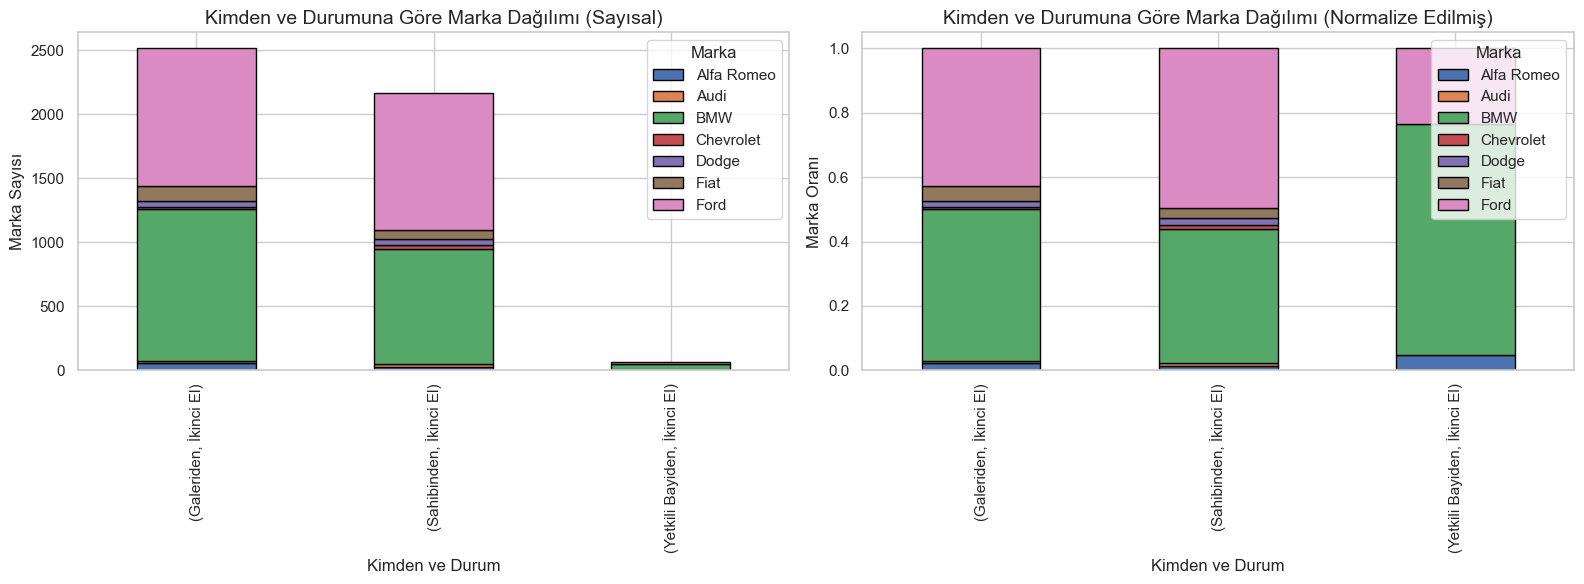

In [57]:
# Kimden ve durumuna göre marka dağılımı (sayısal değerler)
marka_counts = brand_splitted.groupby(['kimden', 'durum', 'marka']).size().unstack(fill_value=0)

# Normalize etme: her grubun toplamına bölme
marka_counts_normalized = marka_counts.div(marka_counts.sum(axis=1), axis=0)

# Grafik oluştur (sayısal değerler ile)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sayısal değerlerin bar grafiği
marka_counts.plot(kind='bar', stacked=True, ax=axes[0], edgecolor='black')
axes[0].set_title('Kimden ve Durumuna Göre Marka Dağılımı (Sayısal)', fontsize=14)
axes[0].set_xlabel('Kimden ve Durum', fontsize=12)
axes[0].set_ylabel('Marka Sayısı', fontsize=12)
axes[0].legend(title='Marka')

# Normalize edilmiş değerlerin bar grafiği
marka_counts_normalized.plot(kind='bar', stacked=True, ax=axes[1], edgecolor='black')
axes[1].set_title('Kimden ve Durumuna Göre Marka Dağılımı (Normalize Edilmiş)', fontsize=14)
axes[1].set_xlabel('Kimden ve Durum', fontsize=12)
axes[1].set_ylabel('Marka Oranı', fontsize=12)
axes[1].legend(title='Marka')

# Göster
plt.tight_layout()
plt.show()

-> we can also do classification on the sehir datas like average price area with 4 class. (BONUS)

1. Dataset;
- 4 city class
- "durum" is not in the df (because there only one choice)
- One Hot ("marka", "seri", "kasa", "renk", "cekis", "ust_model", "alt_model", "kimden")
- Label Encoder( "garanti", "sehir", "vites", "takas", "agirHasar")
- Splitted df for the train and test by model, submodel, series

# Preparing Data For the Model

## Train - Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
brand_splitted['combined_model'] = brand_splitted["seri"] + ' ' + brand_splitted["ust_model"] + ' ' + brand_splitted["alt_model"]

In [60]:
kind_list = brand_splitted["combined_model"].unique()

In [61]:
def train_test_split_sp(df, combined_model, kind_list, test_size):
    
    if "fiyat" not in df.columns:
        raise ValueError("DataFrame içinde 'fiyat' sütunu bulunamadı.")
    
    X_train = pd.DataFrame(columns=df.columns.drop('fiyat'))
    X_test = pd.DataFrame(columns=df.columns.drop('fiyat'))
    y_train = pd.Series(dtype=float, name="fiyat")
    y_test = pd.Series(dtype=float, name="fiyat")
    
    for kind in kind_list:
        temp_df = df[df[combined_model] == kind]
        
        if len(temp_df) > 1:
            # Özellikler ve hedef değişkeni ayırma
            X = temp_df.drop('fiyat', axis=1)
            y = temp_df['fiyat']  # Hedef değişken

            # Veriyi eğitim ve test setlerine ayırma
            X_train_kind, X_test_kind, y_train_kind, y_test_kind = train_test_split(
                X, y, test_size=test_size, random_state=42
            )

            # Yeni veriyi mevcut veri çerçevelerine ekleme
            X_train = pd.concat([X_train, X_train_kind], axis=0)
            X_test = pd.concat([X_test, X_test_kind], axis=0)
            y_train = pd.concat([y_train, y_train_kind], axis=0)
            y_test = pd.concat([y_test, y_test_kind], axis=0)
        else:
            print(f"Warning: 'kind' {kind} has fewer than 2 samples. Skipping split.")

    X_train = X_train.drop(['combined_model'], axis=1)
    X_test = X_test.drop(['combined_model'], axis=1)
    return X_train, X_test, y_train, y_test

## One-Hot and Label Encoder

in this section we will do convert datas in the columns, because a machine learning and deep learning model 
cant work with the string every datas has to be numerical datas

In [104]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [105]:
def apply_onehot_encoder(df, columns_to_encode):
    """
    Verilen kolonlara sadece OneHotEncoder uygular.
    
    Args:
        df (DataFrame): İşlem yapılacak DataFrame.
        columns_to_encode (list): OneHotEncoder uygulanacak kolon isimleri.
    
    Returns:
        DataFrame: OneHotEncoder uygulanmış ve tipleri int64'e dönüştürülmüş DataFrame.
    """
    # Yeni bir DataFrame oluşturuyoruz
    df_encoded = df.copy()
    
    # OneHotEncoder'ı tanımlıyoruz
    encoder = OneHotEncoder(sparse_output=False)  # drop='first' kaldırıldı

    for column in columns_to_encode:
        # Kolonu reshape edip encode ediyoruz
        encoded_data = encoder.fit_transform(df[column].values.reshape(-1, 1))
        
        # Yeni kolonlar oluşturuyoruz ve eski kolon yerine ekliyoruz
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([column]))
        
        # Yeni kolonları int64'e dönüştürüyoruz
        encoded_df = encoded_df.astype('int64')
        
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1).drop(columns=[column])  # Eski kolonu kaldırıyoruz
    
    return df_encoded

### First Datasets 

In [163]:
fdf = brand_splitted

1. Dataset;
- 4 city class
- One Hot ("marka", "seri", "kasa", "renk", "cekis", "ust_model", "alt_model", "kimden")
- Label Encoder( "garanti", "sehir", "vites", "takas", "agirHasar")
- Splitted df for the train and test by model, submodel, series
- ilanTarihi, durum, uyruk, ilce, no,   are not in the df (because there only one choice)eries

In [165]:
fdf = fdf.drop(['ilanTarihi', 'durum', 'uyruk', 'ilce', 'no'], axis=1)

In [167]:
# Gruplanan şehirleri liste olarak alma
sehirler_grup_bir = list(grup_bir.index)  # 1. grup şehirleri
sehirler_grup_iki = list(grup_iki.index)  # 2. grup şehirleri
sehirler_grup_uc = list(grup_uc.index)    # 3. grup şehirleri
sehirler_grup_dort = list(grup_dort.index)  # 4. grup şehirleri

# Grupları yazdırma
print("Grup 1 Şehirleri:", sehirler_grup_bir)
print("Grup 2 Şehirleri:", sehirler_grup_iki)
print("Grup 3 Şehirleri:", sehirler_grup_uc)
print("Grup 4 Şehirleri:", sehirler_grup_dort)

Grup 1 Şehirleri: ['Adıyaman ', 'Bitlis ', 'İstanbul ', 'Muş ', 'Samsun ', 'Kocaeli ', 'Erzincan ', 'İzmir ', 'Muğla ', 'Gaziantep ', 'Mersin ', 'Afyonkarahisar ', 'Mardin ', 'Kayseri ', 'Bursa ', 'Siirt ', 'Eskişehir ', 'Denizli ', 'Şanlıurfa ']
Grup 2 Şehirleri: ['Sakarya ', 'Balıkesir ', 'Kahramanmaraş ', 'Hatay ', 'Bilecik ', 'Tunceli ', 'Manisa ', 'Aksaray ', 'Kütahya ', 'Zonguldak ', 'Ağrı ', 'Nevşehir ', 'Tokat ', 'Kırklareli ', 'Tekirdağ ', 'Niğde ', 'Konya ', 'Sivas ', 'Batman ', 'Ankara ']
Grup 3 Şehirleri: ['Karaman ', 'Burdur ', 'Yalova ', 'Düzce ', 'Bolu ', 'Kırşehir ', 'Osmaniye ', 'Van ', 'Giresun ', 'Iğdır ', 'Aydın ', 'Edirne ', 'Sinop ', 'Ordu ', 'Şırnak ', 'Diyarbakır ', 'Karabük ', 'Kilis ', 'Erzurum ']
Grup 4 Şehirleri: ['Isparta ', 'Yozgat ', 'Elazığ ', 'Trabzon ', 'Çorum ', 'Çanakkale ', 'Uşak ', 'Antalya ', 'Bartın ', 'Kastamonu ', 'Çankırı ', 'Amasya ', 'Rize ', 'Kars ', 'Adana ', 'Kırıkkale ', 'Malatya ', 'Bingöl ', 'Hakkari ', 'Artvin ']


In [169]:
# Gruplara göre şehirlerin kodlanması
sehir_kodlama = {}
for sehir in sehirler_grup_bir:
    sehir_kodlama[sehir] = 4  # 1. grup -> 4
for sehir in sehirler_grup_iki:
    sehir_kodlama[sehir] = 3  # 2. grup -> 3
for sehir in sehirler_grup_uc:
    sehir_kodlama[sehir] = 2  # 3. grup -> 2
for sehir in sehirler_grup_dort:
    sehir_kodlama[sehir] = 1  # 4. grup -> 1

# Eğitim ve test veri setlerindeki şehir kolonlarını kodlama
fdf['sehir'] = fdf['sehir'].map(sehir_kodlama)

# Şehir kolonunda eksik veri kontrolü
if fdf['sehir'].isnull().any():
    print("Bazı şehirler kodlanamadı. Lütfen kontrol edin.")
else:
    print("Şehir kolonları başarıyla kodlandı!")

# Kodlanmış şehir kolonlarını yazdırma
print(fdf['sehir'].head())

Şehir kolonları başarıyla kodlandı!
0    4
1    4
2    4
3    4
4    4
Name: sehir, dtype: int64


In [171]:
# Kodlama işlemi için haritalama sözlükleri (baş harfleri büyük)
garanti_kodlama = {'Evet': 1, 'Hayır': 0}
vites_kodlama = {'Manuel': 0, 'Otomatik': 1}
takas_kodlama = {'Evet': 1, 'Hayır': 0}
agirHasar_kodlama = {'Evet': 0, 'Hayır': 1}

# fdf üzerindeki kolonlara kodlama işlemi
fdf['garanti'] = fdf['garanti'].map(garanti_kodlama)
fdf['vites'] = fdf['vites'].map(vites_kodlama)
fdf['takas'] = fdf['takas'].map(takas_kodlama)
fdf['agirHasar'] = fdf['agirHasar'].map(agirHasar_kodlama)

# Kodlama sonrası eksik veri kontrolü
if fdf[['garanti', 'vites', 'takas', 'agirHasar']].isnull().any().any():
    print("Kodlama sonrası bazı değerler NaN oldu. Eksik verileri kontrol edin.")
else:
    print("Tüm kodlama işlemleri başarıyla tamamlandı.")

Tüm kodlama işlemleri başarıyla tamamlandı.


In [173]:
columns_to_encode = ["marka", "seri", "kasa", "renk", "cekis", "ust_model", "alt_model", "kimden", "yakit"]

In [175]:
fdf = apply_onehot_encoder(fdf, columns_to_encode)

In [177]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Columns: 137 entries, fiyat to yakit_Hybrid
dtypes: int64(136), object(1)
memory usage: 5.0+ MB


In [178]:
X_train, X_test, y_train, y_test = train_test_split_sp(fdf, "combined_model", kind_list, 0.2)

C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\723519168.py:27: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, y_train_kind], axis=0)
C:\Users\yacan\AppData\Local\Temp\ipykernel_8360\723519168.py:28: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_test = pd.concat([y_test, y_test_kind], axis=0)


In [179]:
print("Eğitim Verisi X_train Boyutu:", X_train.shape)
print("Test Verisi X_test Boyutu:", X_test.shape)
print("Eğitim Verisi y_train Boyutu:", y_train.shape)
print("Test Verisi y_test Boyutu:", y_test.shape)

Eğitim Verisi X_train Boyutu: (3772, 135)
Test Verisi X_test Boyutu: (973, 135)
Eğitim Verisi y_train Boyutu: (3772,)
Test Verisi y_test Boyutu: (973,)


In [180]:
# X_train ve X_test veri setindeki tüm sayısal kolonları 'float64' tipine dönüştürme
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Aynı şekilde hedef değişkeni (y) için de dönüştürme
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

In [181]:
# X_train ve X_test veri setlerinde sayısal olmayan kolonları sayısal yapma
non_numeric_columns = X_train.columns[X_train.dtypes != 'float64']  # Sayısal olmayan kolonları bul
non_numeric_columns

Index([], dtype='object')

In [182]:
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test

X_train2['target'] = y_train
X_test2['target'] = y_test

pre_model = pd.concat([X_train, X_test], ignore_index=True)

pre_model.to_csv('pre_model.csv', index=False)

In [147]:
# X_train ve X_test arasındaki kolon farklarını tespit etme
missing_in_train = set(X_test.columns) - set(X_train.columns)
missing_in_test = set(X_train.columns) - set(X_test.columns)

# Eksik kolonları 0 ile ve uygun veri tipiyle her iki DataFrame'e ekleme
for col in missing_in_train:
    X_train[col] = 0.0  # veya istediğiniz başka bir değer

for col in missing_in_test:
    X_test[col] = 0.0  # veya istediğiniz başka bir değer

# Kolon sıralarını uyumlu hale getirme (sıra aynı olmalı)
X_train = X_train[sorted(X_train.columns)]
X_test = X_test[sorted(X_test.columns)]

# Her iki veri setinde de aynı kolonlar olacak şekilde
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# MODELS

# for First DataFrame

### XGBOOST Model - Test R²: 0.939

In [151]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

# XGBoost modelini oluşturma
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.2,
                          max_depth=5, alpha=10, n_estimators=10)

# Modeli eğitim verisiyle eğitme
xg_reg.fit(X_train, y_train)

# Eğitim ve test verileriyle tahmin yapma
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# MSE, R2, ve Accuracy hesaplama
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# XGBoost regresyon modelinde Accuracy genellikle kullanılmaz, ancak MAE hesaplanabilir
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Sonuçları yazdırma
print(f"Eğitim MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Eğitim R²: {r2_train}")
print(f"Test R²: {r2_test}")
print(f"Eğitim MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Eğitim MSE: 46746520627.91516
Test MSE: 50182800164.035835
Eğitim R²: 0.9434212492779828
Test R²: 0.9394714013798284
Eğitim MAE: 145801.89923283405
Test MAE: 147992.6124421891


In [152]:
# Eğer y_pred veya y_true çok boyutluysa, onları tek boyutlu hale getirelim
y_test_pred = y_test_pred.ravel()  # ya da y_pred.flatten() kullanılabilir
y_test = y_test.ravel()  # ya da y_true.flatten() kullanılabilir

# Belirli bir tolerans değeri ile doğru tahminleri kontrol edelim (örneğin, %5 tolerans)
tolerance = 0.05 * y_test  # %5 tolerans

# Doğru tahminleri bulalım
correct_predictions = np.abs(y_test_pred - y_test) <= tolerance

# Yanlış tahminleri bulalım
incorrect_predictions = ~correct_predictions  # True yerine False, False yerine True

# Doğru tahminlerin satır indekslerini alalım
correct_rows = np.where(correct_predictions)[0]

# Yanlış tahminlerin satır indekslerini alalım
incorrect_rows = np.where(incorrect_predictions)[0]

# Sonuçları yazdıralım
print(f"Doğru tahminler yapılan satırlar: {correct_rows}")
print(f"Yanlış tahminler yapılan satırlar: {incorrect_rows}")

Doğru tahminler yapılan satırlar: [  7  10  11  12  15  16  17  20  21  24  25  31  34  39  47  50  53  54
  56  57  59  60  61  62  65  66  67  73  74  78  79  84  87  88  89  90
  91  93  97  98  99 100 108 109 113 116 119 121 127 130 134 137 138 139
 140 142 143 144 145 168 170 173 174 176 178 179 180 183 184 185 192 193
 195 203 204 208 211 212 213 222 224 225 229 230 234 239 241 242 243 246
 248 250 251 252 253 255 256 258 260 263 275 278 285 289 294 295 297 298
 300 301 307 308 310 312 314 318 320 330 337 341 345 350 353 356 357 358
 364 366 378 380 396 398 403 404 416 419 424 425 428 429 434 436 438 446
 475 478 479 480 484 486 487 490 491 492 494 495 496 500 501 502 511 513
 514 517 520 521 522 523 525 527 530 531 532 533 537 538 539 541 542 544
 545 546 547 550 551 552 556 558 559 560 561 566 567 569 570 571 574 575
 576 577 578 579 580 581 584 585 587 588 589 590 592 593 597 599 600 601
 604 605 610 612 613 614 616 617 618 619 620 623 631 632 634 635 637 638
 639 640 641 642 

In [153]:
import xgboost as xgb
import joblib

# Modeli 'model_joblib.pkl' adıyla kaydetme
joblib.dump(xg_reg, 'model_joblib.pkl')
# Modeli eğittikten sonra kaydedebilirsiniz
xg_reg.save_model('xgboost_model.json')

### ReLu - Adam - R2 Score: 0.9128294080473546

In [154]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 2.4 MB/s eta 0:02:43
   ---------------------------------------- 1.0/390.3 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 1.3/390.3 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 1.8/390.3 MB 2.1 MB/s eta 0:03:06
   ---------------------------------------- 2.

In [202]:
# Gerekli Kütüphaneler
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veriyi yükleme ve hazırlama (örnek veri seti olarak df kullanılıyor)
# df ve target değişkeni zaten split edilmiş olmalı
# X = Özellikler, y = Hedef (target)
X = pre_model.drop(columns=['target'])  # Hedef değişkeni dışındaki tüm sütunlar
y = pre_model['target']  # Hedef değişken

# Veriyi normalize etme
scaler = StandardScaler()



X_scaled = scaler.fit_transform(X)

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Yapay Sinir Ağı Modeli
model = Sequential()

# İlk gizli katman
model.add(Dense(units=512, activation='relu', input_dim=X_train.shape[1]))

# Dropout katmanı (overfitting'i engellemek için)
model.add(Dropout(0.2))

# İkinci gizli katman
model.add(Dense(units=256, activation='relu'))

# Dropout katmanı
model.add(Dropout(0.2))

# üçüncü gizli katman
model.add(Dense(units=128, activation='relu'))

# Dropout katmanı
model.add(Dropout(0.2))

# Çıkış katmanı (regresyon için tek bir değer)
model.add(Dense(units=1))

# Modeli derleme (regresyon için 'mean_squared_error' kaybı kullanılır)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Modelin test verisi ile tahmin yapma
y_test_pred = model.predict(X_test)

# Modelin başarımını değerlendirme
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"R² Skoru: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Epoch 1/100


c:\Users\yacan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2854464782336.0000 - mae: 1420407.1250 - val_loss: 2481435705344.0000 - val_mae: 1329466.3750
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1824889241600.0000 - mae: 1093168.3750 - val_loss: 231951892480.0000 - val_mae: 363550.9688
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235287461888.0000 - mae: 355195.6562 - val_loss: 118367969280.0000 - val_mae: 256599.5312
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130854903808.0000 - mae: 255911.4531 - val_loss: 92309692416.0000 - val_mae: 216139.8125
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105202352128.0000 - mae: 230168.0156 - val_loss: 81002512384.0000 - val_mae: 197702.3438
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92020310016.0000 - mae: 213336.1250 - val_loss: 74445455360.0000 - val_mae: 185946.9375
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82099847168.0000 - mae: 199837.8594 - val_l

In [203]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Tahminleri yap
predictions = model.predict(X_test)

# R² Skoru
r2 = r2_score(y_test, predictions)
print(f"R² Skoru: {r2:.4f}")

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² Skoru: 0.9558
Mean Absolute Error (MAE): 114971.5727
Mean Squared Error (MSE): 35799089950.2870
Root Mean Squared Error (RMSE): 189206.4744


In [204]:
# Modeli kaydetme (tam model)
model.save('last_model.keras')  # model_full.h5, modeli ve ağırlıkları kaydedecek dosya
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

In [ ]:
#model = load_model('trained_model.keras')  import model after predict another datas